#Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import seaborn as sns; sns.set()
from matplotlib.pyplot import figure
import seaborn as sns; sns.set_theme()
import warnings
warnings.filterwarnings('ignore')

# Problem 1: Linear Regression


You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.


Dataset for Problem 1: cubic_zirconia.csv


# Data Dictionary

Variable Name	   Description

Carat:	           Carat weight of the cubic zirconia.

Cut:                Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.

Color :	           Colour of the cubic zirconia.With D being the worst and J the best.

Clarity:	           cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Worst to Best) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1

Depth	:           The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

Table	:          The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

Price	:          the Price of the cubic zirconia.

X	    :          Length of the cubic zirconia in mm.

Y	    :          Width of the cubic zirconia in mm.

Z	    :          Height of the cubic zirconia in mm.


# 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.


In [2]:
#Read the data

In [2]:
df1 = pd.read_csv('cubic_zirconia.csv')

In [3]:
df1.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [3]:
df1.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

# Null values, Description, Data types, Shape, EDA, Duplicate values analysis

In [6]:
df1.shape

(26967, 11)

Total 11 columns and 26967 raws. Out of 11, one is having indexed value which does not required. So, I will remove Unnamed: 0 field

In [4]:
#Can remove the first field Unnamed: 0 as it is only an indexed value
df_zirconia = df1.drop('Unnamed: 0',axis=1)

In [6]:
df_zirconia.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [9]:
df_zirconia.shape

(26967, 10)

There are total 10 fields and 26967 raws

In [5]:
df_zirconia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


All are numeric except cut, color and clarity field. All data amount is same except for depth. It means there is null values in 
depth field

In [6]:
df_zirconia.isna().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

There are 697 Null values for depth field. All others are having not null values

In [7]:
df_zirconia.duplicated().sum()

34

There are 34 duplicate data. As it is very less in compare to actual data set so we can simply remove.

In [8]:
duplicate=df_zirconia.duplicated()
df_zirconia[duplicate]

,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


Above are the duplicate data

#Remove duplicate value

In [9]:
df_zirconia.drop_duplicates(inplace=True)

In [10]:
df_zirconia.duplicated().sum()

0

Now duplicates are removed

In [11]:
df_zirconia.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.798010,0.477237,0.2,0.40,0.70,1.05,4.50
depth,26236.0,61.745285,1.412243,50.8,61.00,61.80,62.50,73.60
table,26933.0,57.455950,2.232156,49.0,56.00,57.00,59.00,79.00
x,26933.0,5.729346,1.127367,0.0,4.71,5.69,6.55,10.23
y,26933.0,5.733102,1.165037,0.0,4.71,5.70,6.54,58.90
z,26933.0,3.537769,0.719964,0.0,2.90,3.52,4.04,31.80
price,26933.0,3937.526120,4022.551862,326.0,945.00,2375.00,5356.00,18818.00


In [17]:
df_zirconia.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [11]:
df_zirconia.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

# Univariate Analysis

#For univariate analysis we need to analyze minimum value, maximum value, IQR, standard deviation, and Coefficent of variation
for Numeric fields

Carat:  Carat weight of the cubic zirconia

In [13]:
minimum= df_zirconia['carat'].min()
maximum = df_zirconia['carat'].max()
std = df_zirconia['carat'].std()
data_range= df_zirconia['carat'].max() - df_zirconia['carat'].min()
Mean= df_zirconia['carat'].mean()
first_qtr = df_zirconia['carat'].quantile(q=0.25)
third_qtr = df_zirconia['carat'].quantile(q=0.75)
IQR = stats.iqr(df_zirconia['carat'])
LR =  df_zirconia['carat'].quantile(q=0.25) - (1.5 * stats.iqr(df_zirconia['carat']))
UR = df_zirconia['carat'].quantile(q=0.75) + (1.5 * stats.iqr(df_zirconia['carat']))
CV= std / Mean

data_carat = {'Min': [minimum], 'Max': [maximum], 'Std': [std], 'Data_Range': [data_range]
, 'Average': [Mean], '25%': [first_qtr] , '75%': [third_qtr], 'IQR': [IQR], 'LR': [LR]
                    ,'UR': [UR], 'CV': [CV]}

carat_analysis = pd.DataFrame(data_carat)

cm = sns.dark_palette("white", reverse=True,as_cmap=True)

(carat_analysis.style.background_gradient(cmap=cm)).set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt')]}])

,Min,Max,Std,Data_Range,Average,25%,75%,IQR,LR,UR,CV
0,0.200000,4.500000,0.477237,4.300000,0.798010,0.400000,1.050000,0.650000,-0.575000,2.025000,0.598034


Table: The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter

In [15]:
minimum= df_zirconia['table'].min()
maximum = df_zirconia['table'].max()
std = df_zirconia['table'].std()
data_range= df_zirconia['table'].max() - df_zirconia['table'].min()
Mean= df_zirconia['table'].mean()
first_qtr = df_zirconia['table'].quantile(q=0.25)
third_qtr = df_zirconia['table'].quantile(q=0.75)
IQR = stats.iqr(df_zirconia['table'])
LR =  df_zirconia['table'].quantile(q=0.25) - (1.5 * stats.iqr(df_zirconia['table']))
UR = df_zirconia['table'].quantile(q=0.75) + (1.5 * stats.iqr(df_zirconia['table']))
CV= std / Mean

data_table = {'Min': [minimum], 'Max': [maximum], 'Std': [std], 'Data_Range': [data_range]
, 'Average': [Mean], '25%': [first_qtr] , '75%': [third_qtr], 'IQR': [IQR], 'LR': [LR]
                    ,'UR': [UR], 'CV': [CV]}

table_analysis = pd.DataFrame(data_table)

cm = sns.dark_palette("white", reverse=True,as_cmap=True)

(table_analysis.style.background_gradient(cmap=cm)).set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt')]}])

,Min,Max,Std,Data_Range,Average,25%,75%,IQR,LR,UR,CV
0,49.000000,79.000000,2.232156,30.000000,57.455950,56.000000,59.000000,3.000000,51.500000,63.500000,0.038850


Depth : The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

In [17]:
minimum= df_zirconia['depth'].min()
maximum = df_zirconia['depth'].max()
std = df_zirconia['depth'].std()
data_range= df_zirconia['depth'].max() - df_zirconia['depth'].min()
Mean= df_zirconia['depth'].mean()
first_qtr = df_zirconia['depth'].quantile(q=0.25)
third_qtr = df_zirconia['depth'].quantile(q=0.75)
IQR = stats.iqr(df_zirconia['depth'])
LR =  df_zirconia['depth'].quantile(q=0.25) - (1.5 * stats.iqr(df_zirconia['depth']))
UR = df_zirconia['depth'].quantile(q=0.75) + (1.5 * stats.iqr(df_zirconia['depth']))
CV= std / Mean

data_depth = {'Min': [minimum], 'Max': [maximum], 'Std': [std], 'Data_Range': [data_range]
, 'Average': [Mean], '25%': [first_qtr] , '75%': [third_qtr], 'IQR': [IQR], 'LR': [LR]
                    ,'UR': [UR], 'CV': [CV]}

depth_analysis = pd.DataFrame(data_depth)

cm = sns.dark_palette("white", reverse=True,as_cmap=True)

(depth_analysis.style.background_gradient(cmap=cm)).set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt')]}])

,Min,Max,Std,Data_Range,Average,25%,75%,IQR,LR,UR,CV
0,50.800000,73.600000,1.412243,22.800000,61.745285,61.000000,62.500000,nan,nan,nan,0.022872


In [23]:
#X: length of the cubic zirconia in mm

In [19]:
minimum= df_zirconia['x'].min()
maximum = df_zirconia['x'].max()
std = df_zirconia['x'].std()
data_range= df_zirconia['x'].max() - df_zirconia['x'].min()
Mean= df_zirconia['x'].mean()
first_qtr = df_zirconia['x'].quantile(q=0.25)
third_qtr = df_zirconia['x'].quantile(q=0.75)
IQR = stats.iqr(df_zirconia['x'])
LR =  df_zirconia['x'].quantile(q=0.25) - (1.5 * stats.iqr(df_zirconia['x']))
UR = df_zirconia['x'].quantile(q=0.75) + (1.5 * stats.iqr(df_zirconia['x']))
CV= std / Mean

data_x = {'Min': [minimum], 'Max': [maximum], 'Std': [std], 'Data_Range': [data_range]
, 'Average': [Mean], '25%': [first_qtr] , '75%': [third_qtr], 'IQR': [IQR], 'LR': [LR]
                    ,'UR': [UR], 'CV': [CV]}

x_analysis = pd.DataFrame(data_x)

cm = sns.dark_palette("white", reverse=True,as_cmap=True)

(x_analysis.style.background_gradient(cmap=cm)).set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt')]}])

,Min,Max,Std,Data_Range,Average,25%,75%,IQR,LR,UR,CV
0,0.000000,10.230000,1.127367,10.230000,5.729346,4.710000,6.550000,1.840000,1.950000,9.310000,0.196771


Y: Width of the cubic zirconia in mm

In [21]:
minimum= df_zirconia['y'].min()
maximum = df_zirconia['y'].max()
std = df_zirconia['y'].std()
data_range= df_zirconia['y'].max() - df_zirconia['y'].min()
Mean= df_zirconia['y'].mean()
first_qtr = df_zirconia['y'].quantile(q=0.25)
third_qtr = df_zirconia['y'].quantile(q=0.75)
IQR = stats.iqr(df_zirconia['y'])
LR =  df_zirconia['y'].quantile(q=0.25) - (1.5 * stats.iqr(df_zirconia['y']))
UR = df_zirconia['y'].quantile(q=0.75) + (1.5 * stats.iqr(df_zirconia['y']))
CV= std / Mean

data_y = {'Min': [minimum], 'Max': [maximum], 'Std': [std], 'Data_Range': [data_range]
, 'Average': [Mean], '25%': [first_qtr] , '75%': [third_qtr], 'IQR': [IQR], 'LR': [LR]
                    ,'UR': [UR], 'CV': [CV]}

y_analysis = pd.DataFrame(data_y)

cm = sns.dark_palette("white", reverse=True,as_cmap=True)

(y_analysis.style.background_gradient(cmap=cm)).set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt')]}])

,Min,Max,Std,Data_Range,Average,25%,75%,IQR,LR,UR,CV
0,0.000000,58.900000,1.165037,58.900000,5.733102,4.710000,6.540000,1.830000,1.965000,9.285000,0.203212


Z: Height of the cubic zirconia in mm.

In [22]:
minimum= df_zirconia['z'].min()
maximum = df_zirconia['z'].max()
std = df_zirconia['z'].std()
data_range= df_zirconia['z'].max() - df_zirconia['z'].min()
Mean= df_zirconia['z'].mean()
first_qtr = df_zirconia['z'].quantile(q=0.25)
third_qtr = df_zirconia['z'].quantile(q=0.75)
IQR = stats.iqr(df_zirconia['z'])
LR =  df_zirconia['z'].quantile(q=0.25) - (1.5 * stats.iqr(df_zirconia['z']))
UR = df_zirconia['z'].quantile(q=0.75) + (1.5 * stats.iqr(df_zirconia['z']))
CV= std / Mean

data_z = {'Min': [minimum], 'Max': [maximum], 'Std': [std], 'Data_Range': [data_range]
, 'Average': [Mean], '25%': [first_qtr] , '75%': [third_qtr], 'IQR': [IQR], 'LR': [LR]
                    ,'UR': [UR], 'CV': [CV]}

z_analysis = pd.DataFrame(data_z)

cm = sns.dark_palette("white", reverse=True,as_cmap=True)

(z_analysis.style.background_gradient(cmap=cm)).set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt')]}])

,Min,Max,Std,Data_Range,Average,25%,75%,IQR,LR,UR,CV
0,0.000000,31.800000,0.719964,31.800000,3.537769,2.900000,4.040000,1.140000,1.190000,5.750000,0.203508


Price : the Price of the cubic zirconia.

In [23]:
minimum= df_zirconia['price'].min()
maximum = df_zirconia['price'].max()
std = df_zirconia['price'].std()
data_range= df_zirconia['price'].max() - df_zirconia['price'].min()
Mean= df_zirconia['price'].mean()
first_qtr = df_zirconia['price'].quantile(q=0.25)
third_qtr = df_zirconia['price'].quantile(q=0.75)
IQR = stats.iqr(df_zirconia['price'])
LR =  df_zirconia['price'].quantile(q=0.25) - (1.5 * stats.iqr(df_zirconia['price']))
UR = df_zirconia['price'].quantile(q=0.75) + (1.5 * stats.iqr(df_zirconia['price']))
CV= std / Mean

data_price = {'Min': [minimum], 'Max': [maximum], 'Std': [std], 'Data_Range': [data_range]
, 'Average': [Mean], '25%': [first_qtr] , '75%': [third_qtr], 'IQR': [IQR], 'LR': [LR]
                    ,'UR': [UR], 'CV': [CV]}

price_analysis = pd.DataFrame(data_price)

cm = sns.dark_palette("white", reverse=True,as_cmap=True)

(price_analysis.style.background_gradient(cmap=cm)).set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt')]}])

,Min,Max,Std,Data_Range,Average,25%,75%,IQR,LR,UR,CV
0,326,18818,4022.551862,18492,3937.526120,945.000000,5356.000000,4411.000000,-5671.500000,11972.500000,1.021594


Checking outlier for all the vaiables using Boxplot

In [25]:
df_zirconia_numc=df_zirconia.drop(['cut','color','clarity'],axis=1)
#sns.boxplot(x="variable", y="value", data=pd.melt(df_zirconia))

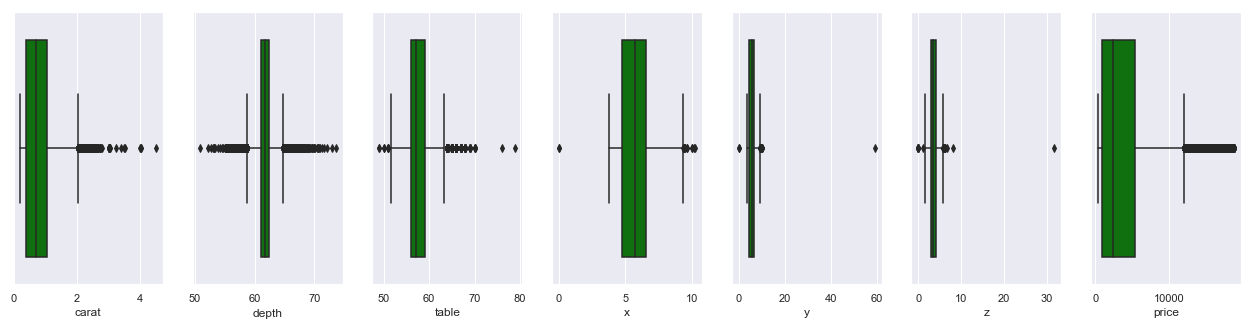

In [27]:
fig, (x1,x2,x3,x4,x5,x6,x7)=plt.subplots(1,7,figsize=(22,5))
sns.boxplot(x='carat',data=df_zirconia_numc,ax=x1,color='green')
sns.boxplot(x='depth',data=df_zirconia_numc,ax=x2,color='green')
sns.boxplot(x='table',data=df_zirconia_numc,ax=x3,color='green')
sns.boxplot(x='x',data=df_zirconia_numc,ax=x4,color='green')
sns.boxplot(x='y',data=df_zirconia_numc,ax=x5,color='green')
sns.boxplot(x='z',data=df_zirconia_numc,ax=x6,color='green')
sns.boxplot(x='price',data=df_zirconia_numc,ax=x7,color='green')

Outlier is present in all the numeric variables

Checking distribution of the data using histplot:

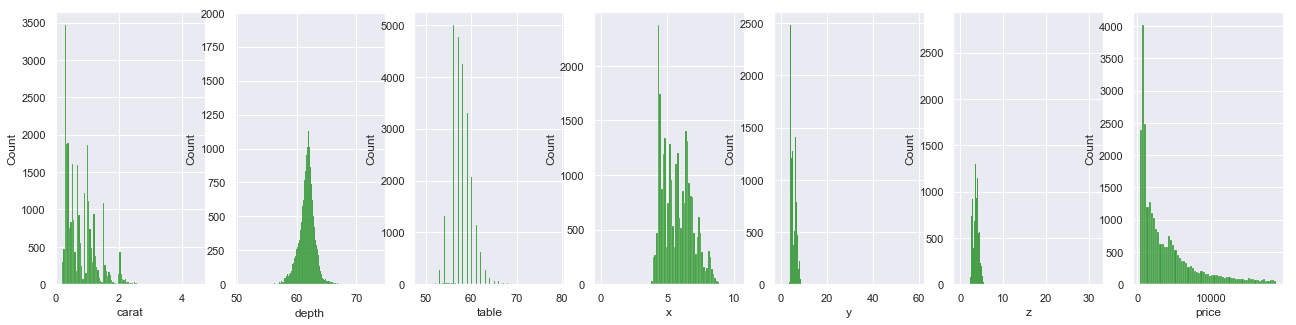

In [33]:
fig, (x1,x2,x3,x4,x5,x6,x7)=plt.subplots(1,7,figsize=(22,5))
sns.histplot(x='carat',data=df_zirconia_numc,ax=x1,color='green')
sns.histplot(x='depth',data=df_zirconia_numc,ax=x2,color='green')
sns.histplot(x='table',data=df_zirconia_numc,ax=x3,color='green')
sns.histplot(x='x',data=df_zirconia_numc,ax=x4,color='green')
sns.histplot(x='y',data=df_zirconia_numc,ax=x5,color='green')
sns.histplot(x='z',data=df_zirconia_numc,ax=x6,color='green')
sns.histplot(x='price',data=df_zirconia_numc,ax=x7,color='green')

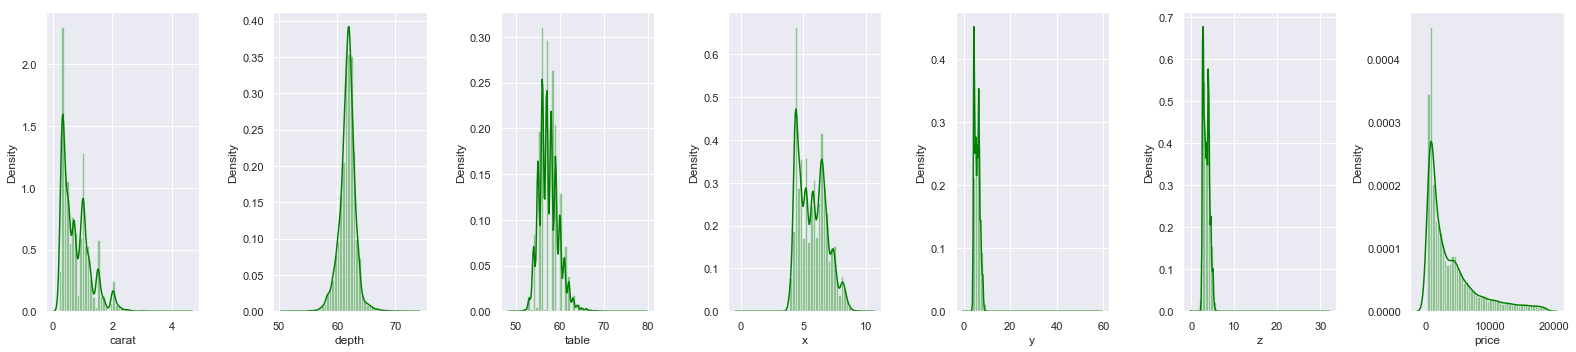

In [32]:
fig, (x1,x2,x3,x4,x5,x6,x7)=plt.subplots(1,7,figsize=(22,5))
sns.distplot(df_zirconia_numc['carat'],ax=x1,color='green')
sns.distplot(df_zirconia_numc['depth'],ax=x2,color='green')
sns.distplot(df_zirconia_numc['table'],ax=x3,color='green')
sns.distplot(df_zirconia_numc['x'],ax=x4,color='green')
sns.distplot(df_zirconia_numc['y'],ax=x5,color='green')
sns.distplot(df_zirconia_numc['z'],ax=x6,color='green')
sns.distplot(df_zirconia_numc['price'],ax=x7,color='green')
plt.grid()
plt.tight_layout()

Categorical Uni-variate Analysis

Cut: Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.

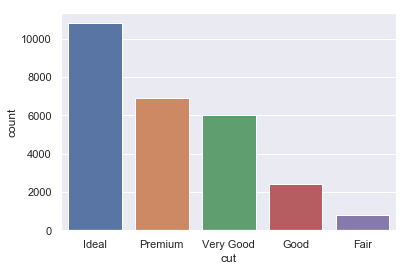

In [27]:
sns.countplot(x='cut',data=df_zirconia);

1. There are total 5 cutting category(Ideal, Premium, Vary good cut, good, fair)

2. It depicts Ideal is being the most popular category among other while, fair is the least favorable category.

Color : Colour of the cubic zirconia.With D being the worst and J the best.

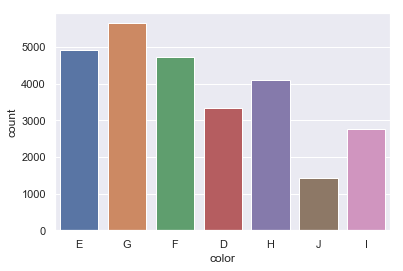

In [34]:
sns.countplot(x='color',data=df_zirconia);

1. There are total 7 color codes for the cubic zirconia (E, G, F,D,H,J,I)

2. As per the bar graph, it seems "G" is having the highest popularity whereas, "J" is having the minimum popularity

Clarity: cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Worst to Best) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1

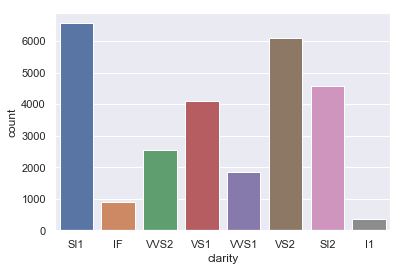

In [35]:
sns.countplot(x='clarity',data=df_zirconia);

1. In the cubic zirconia there are different types of clarity. For an instance: IF is thet worst clarity whereas, I1 is the best quality

2. However, SI1 is the largesting selling quality zirconia and even if I1 is the best quality still this is the least popular
among all. Infact, IF the worst clarity but the selling of IF is better than I1.

3. the second highest popularity seems to be VS2

# Bi-Variate Analysis

Lets check which components impact the price of cubic zirconia

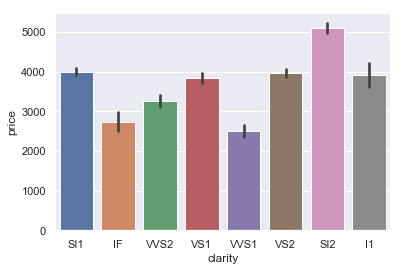

In [30]:
sns.barplot(x='clarity',y='price',data=df_zirconia)

1. Best quality is I1, still price is highesr for S12 clarity product.

2. WS1 is having the least price in compare to all

3. IF is having the worst quality but still price is higher then WS1. Infact, selling is higher for WS1 then IF, still
price is higher

4. Do not think so, that price is dependent on clarity as we can see clearly, highest quality product which is L1 has less price 
in compare to SI2, VS2 and SI1

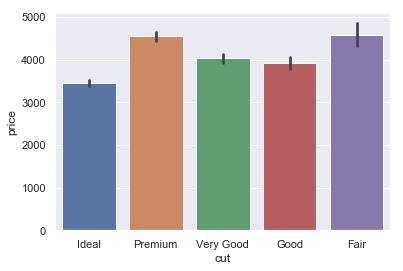

In [36]:
sns.barplot(x='cut',y='price',data=df_zirconia)

1. As we know quality increases based on cutting in order of Fair, Good, Very Good, Premium, Ideal.

2. Followed by, Fair is the low quality where as Ideal is the highest quality. But ideal seems does not have higest price, but
   Fair being the low quality has highest price.

3. However, premium is coming in second lowest quality but still, price is the 2nd highest

4. So, in this case also we cant say that price is dependant on cut

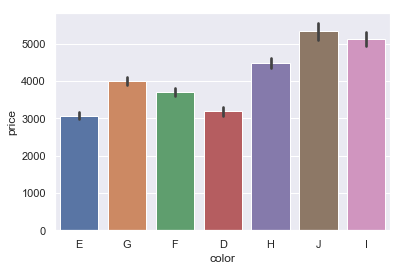

In [37]:
sns.barplot(x='color',y='price',data=df_zirconia)

1. "J" color is having the higest price where as color "D" is having less price

2. It is clearly visible that price is dependant on color. Based on color, price increses or decreses.

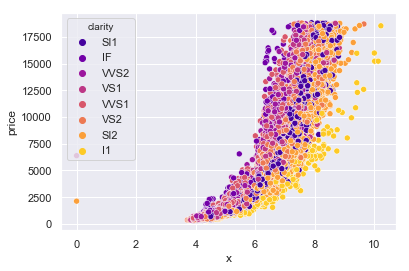

In [331]:
sns.scatterplot(x='x', y ='price', hue='clarity', data=df_zirconia,palette='plasma')

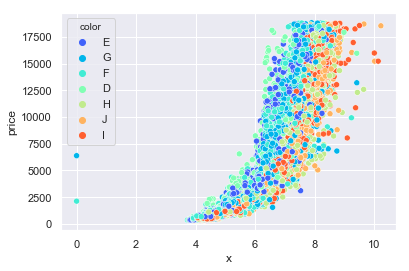

In [38]:
sns.scatterplot(x='x', y ='price', hue='color', data=df_zirconia,palette='rainbow')

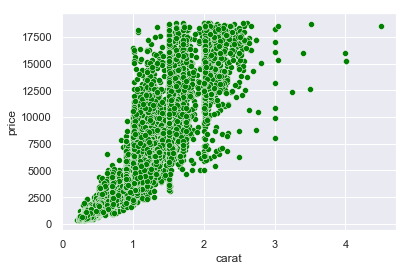

In [336]:
sns.scatterplot(x='carat', y ='price', data=df_zirconia,color='green')

# Multi-Variate Analysis

In [39]:
df_zirconia_corr = pd.DataFrame(df_zirconia_numc.corr())

cm = sns.light_palette("pink",as_cmap=True)

(df_zirconia_corr.style.background_gradient(cmap=cm))

,carat,depth,table,x,y,z,price
carat,1.000000,0.035240,0.181539,0.976858,0.941442,0.940982,0.922409
depth,0.035240,1.000000,-0.297768,-0.018401,-0.024453,0.101973,-0.002895
table,0.181539,-0.297768,1.000000,0.196254,0.182352,0.148994,0.126844
x,0.976858,-0.018401,0.196254,1.000000,0.962601,0.956490,0.886554
y,0.941442,-0.024453,0.182352,0.962601,1.000000,0.928725,0.856441
z,0.940982,0.101973,0.148994,0.956490,0.928725,1.000000,0.850682
price,0.922409,-0.002895,0.126844,0.886554,0.856441,0.850682,1.000000


Correlation plot

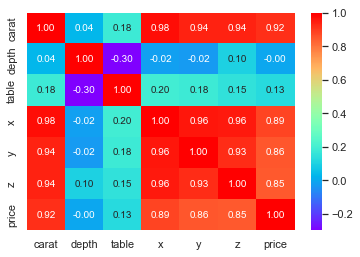

In [342]:
sns.heatmap(df_zirconia_numc.corr(),annot=True,fmt=".2f",cmap="rainbow")

1. There are multiple significant relationships can be seen which are almost more than 85%. So, there is multi colinearity
present in the dataset

2. There are many negative correlation as well and some relationship falls in between 10% to 20% which shows week relationship

3. Positve relation is higher than negative as per the report

4. There are strong relations such as: carat, price, x, y, z,week relation such as depth does not have relationship with any other variable,same way Table also does not have a very good correlation with other variables

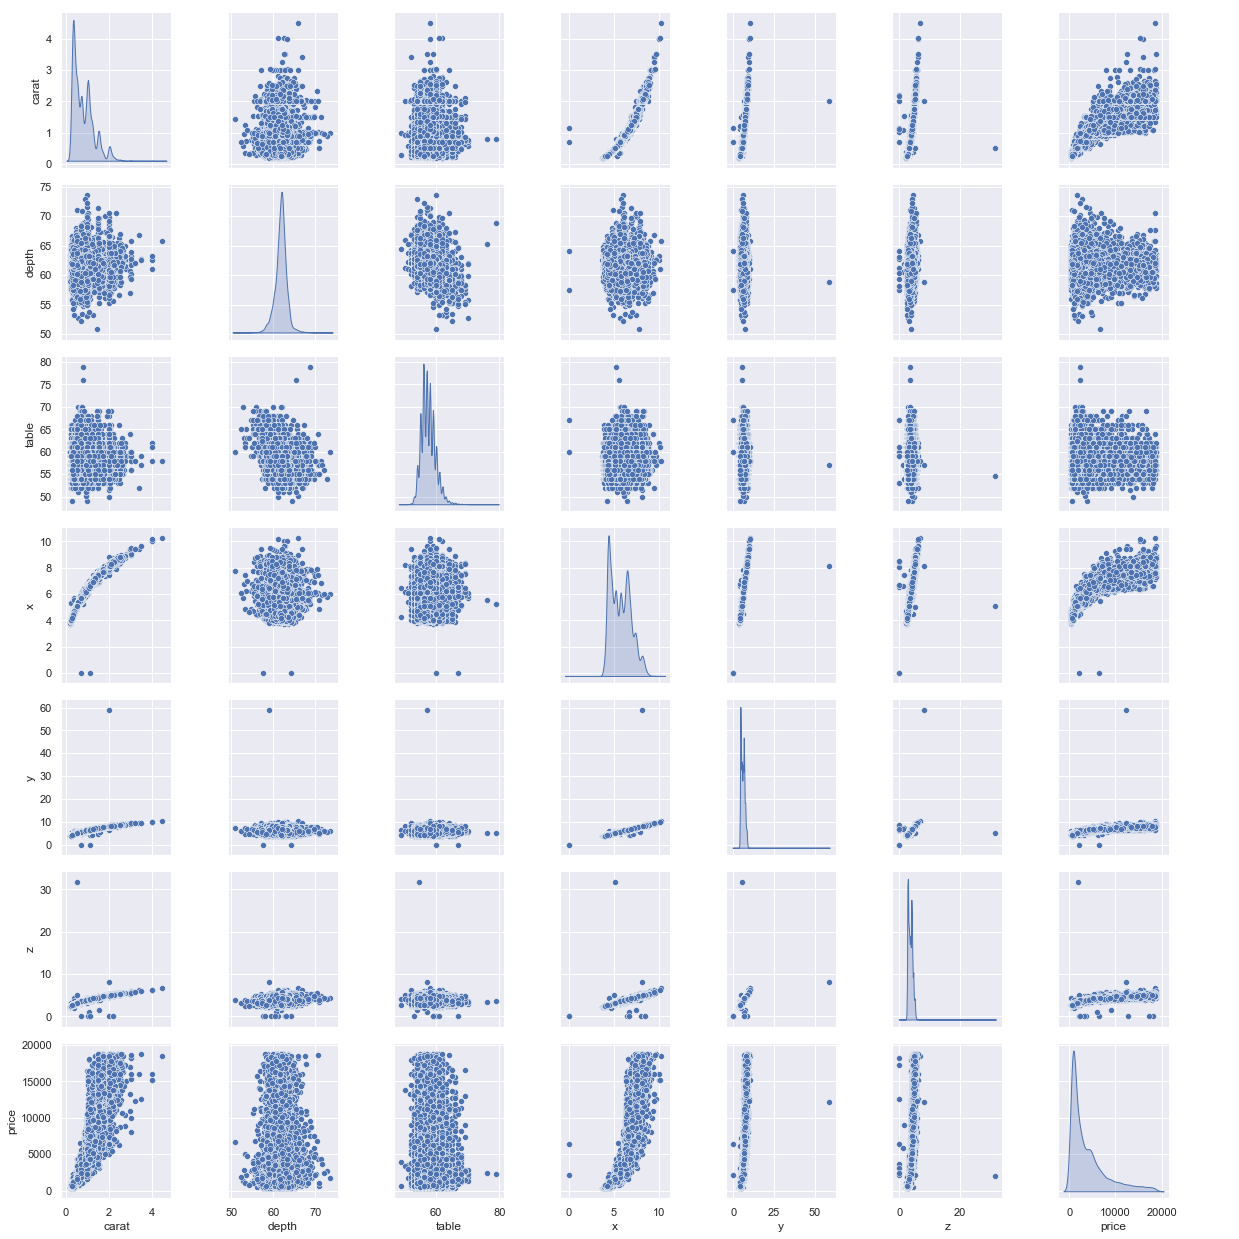

In [42]:
sns.pairplot(df_zirconia,diag_kind='kde')

# 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

# Imputing Null Values and Zero values

Null values present in depth. At the same time zero values present in x,y and z

As missing data present in Numerical dtype variable so we can replace the missing data with mean values

In [40]:
df_zirconia.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

Only depth has missing values

In [41]:
#Check any variable which has 0 value

(df_zirconia['carat']== 0).sum()

0

In [42]:
(df_zirconia['cut'] ==0). sum()

0

In [43]:
(df_zirconia['color']==0). sum()

0

In [44]:
(df_zirconia['clarity']==0). sum()

0

In [45]:
(df_zirconia['table'] ==0). sum()

0

In [46]:
(df_zirconia['price'] ==0). sum()

0

In [47]:
(df_zirconia['x']==0).sum()

2

In [48]:
(df_zirconia['y']==0). sum()

2

In [49]:
(df_zirconia['z']==0). sum()

8

# Does it have any meaning? 

1. 0 value means there must be missing data in x, y and z, due to which the value written as 0. So no meaning!

2. Therefore, we need convert these 0 values to null values to have a proper missing value format 


In [43]:
df_zirconia['x'].replace(0,np.nan,inplace=True)
df_zirconia['y'].replace(0,np.nan,inplace=True)
df_zirconia['z'].replace(0,np.nan,inplace=True)

In [44]:
df_zirconia.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            2
y            2
z            8
price        0
dtype: int64

1. We will not delete the missing data as it may cause data loss

2. So for safer side, we will replace these missing values with mean

In [45]:
for column in df_zirconia.columns:
    if  df_zirconia[column].dtype !='object':
        mean =  df_zirconia[column].mean()
        df_zirconia[column] = df_zirconia[column].fillna(mean)
        

In [11]:
df_zirconia.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [12]:
df_zirconia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [46]:
df_zirconia_copy=df_zirconia.copy()

In [14]:
#Created a copy of the dataset for later use before treating outliers

Missing value and Zero value treatment is completed

# Outlier Treatment

As we already have seen above that there are outliers present in almost all the variables including the dependent variable. So
we will treat all the outliers by replacing with lower range and outer range values

We first did missing value and after that did outlier treatment to avoid any conspiracy in data

In [47]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

## Check the lower range and upper range for the variable with zscore
lr,ur=remove_outlier(df_zirconia['carat'])
print("lower range",lr, "and upper range", ur)

df_zirconia['carat']=np.where(df_zirconia['carat']>ur,ur,df_zirconia['carat'])
df_zirconia['carat']=np.where(df_zirconia['carat']<lr,lr,df_zirconia['carat'])

lower range -0.5750000000000001 and upper range 2.0250000000000004


In [48]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

## Check the lower range and upper range for the variable with zscore
lr,ur=remove_outlier(df_zirconia['table'])
print("lower range",lr, "and upper range", ur)

df_zirconia['table']=np.where(df_zirconia['table']>ur,ur,df_zirconia['table'])
df_zirconia['table']=np.where(df_zirconia['table']<lr,lr,df_zirconia['table'])

lower range 51.5 and upper range 63.5


In [49]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

## Check the lower range and upper range for the variable with zscore
lr,ur=remove_outlier(df_zirconia['x'])
print("lower range",lr, "and upper range", ur)

df_zirconia['x']=np.where(df_zirconia['x']>ur,ur,df_zirconia['x'])
df_zirconia['x']=np.where(df_zirconia['x']<lr,lr,df_zirconia['x'])

lower range 1.9500000000000002 and upper range 9.309999999999999


In [50]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

## Check the lower range and upper range for the variable with zscore
lr,ur=remove_outlier(df_zirconia['y'])
print("lower range",lr, "and upper range", ur)

df_zirconia['y']=np.where(df_zirconia['y']>ur,ur,df_zirconia['y'])
df_zirconia['y']=np.where(df_zirconia['y']<lr,lr,df_zirconia['y'])

lower range 1.9899999999999993 and upper range 9.27


In [51]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

## Check the lower range and upper range for the variable with zscore
lr,ur=remove_outlier(df_zirconia['z'])
print("lower range",lr, "and upper range", ur)

df_zirconia['z']=np.where(df_zirconia['z']>ur,ur,df_zirconia['z'])
df_zirconia['z']=np.where(df_zirconia['z']<lr,lr,df_zirconia['z'])

lower range 1.1899999999999997 and upper range 5.75


In [52]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

## Check the lower range and upper range for the variable with zscore
lr,ur=remove_outlier(df_zirconia['depth'])
print("lower range",lr, "and upper range", ur)

df_zirconia['depth']=np.where(df_zirconia['depth']>ur,ur,df_zirconia['depth'])
df_zirconia['depth']=np.where(df_zirconia['depth']<lr,lr,df_zirconia['depth'])

lower range 59.0 and upper range 64.6


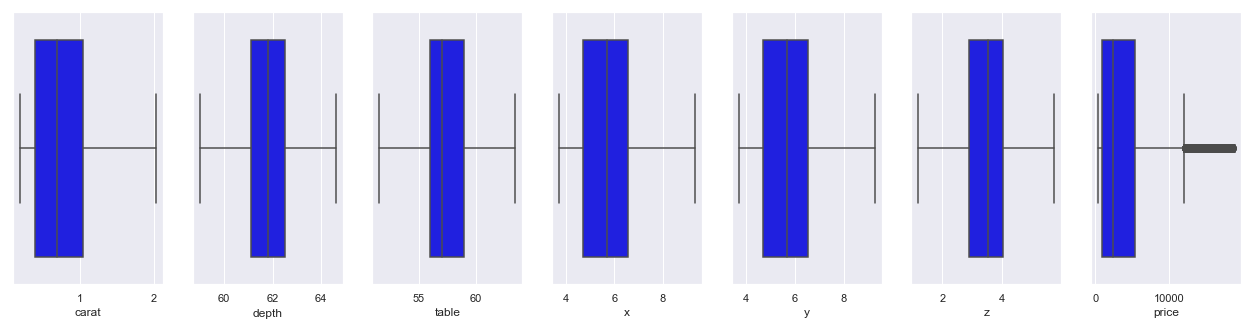

In [53]:
fig, (x1,x2,x3,x4,x5,x6,x7)=plt.subplots(1,7,figsize=(22,5))
sns.boxplot(x='carat',data=df_zirconia,ax=x1,color='blue')
sns.boxplot(x='depth',data=df_zirconia,ax=x2,color='blue')
sns.boxplot(x='table',data=df_zirconia,ax=x3,color='blue')
sns.boxplot(x='x',data=df_zirconia,ax=x4,color='blue')
sns.boxplot(x='y',data=df_zirconia,ax=x5,color='blue')
sns.boxplot(x='z',data=df_zirconia,ax=x6,color='blue')
sns.boxplot(x='price',data=df_zirconia,ax=x7,color='blue')

Now outliers are removed. Since the depend variable price does have a lot of outliers we will perform Log transformation so that it will reduce the skewness

# Scaling of dependent value-Price: Log transformation

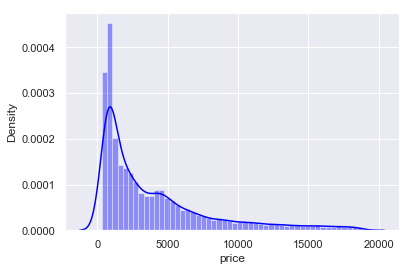

In [54]:
sns.distplot(df_zirconia['price'],color='blue');

In [93]:
from sklearn.preprocessing import FunctionTransformer   

log_transformer = FunctionTransformer(np.log1p,inverse_func=np.exp)

df_zirconia['price_log_trns'] = log_transformer.fit_transform(df_zirconia[['price']]);

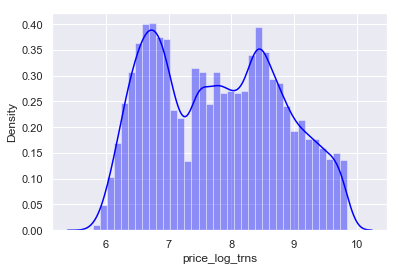

In [56]:
sns.distplot(df_zirconia['price_log_trns'],color='blue')

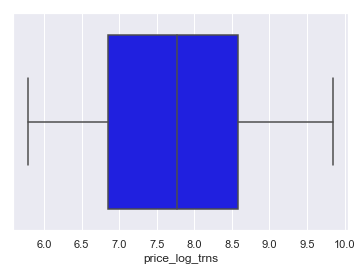

In [57]:
sns.boxplot(df_zirconia['price_log_trns'],color='blue')

In [58]:
#The final data

df_zirconia.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,price_log_trns
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499,6.214608
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984,6.892642
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289,8.746716
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082,6.987490
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779,6.659294


# Treatment of sub levels of a ordinal variables

1. We need to make changes on the sub level of ordinal variable. As we know there are two types of categorical variable. 

   ---Ordinal 
   
   ---Nomial
   
Ordinal means in which sub levels are in ordered categories wise like (first, second-- or good, very good, premium ------)    which can be ordered or ranked.
   
2. Here in this data set it seems like "cut" and "clarity" variable is having the ordinal sub levels because it has values are ordered as per the data dictionary, which are ordered in mannered of "In between categories".

3. And other variable like "color" also can be consider as nomial because in the data dictionary, even if the order of sub-levels are not provided and only the best and worst information is provided, like D is the worst and J is the best, so, from the alphabetical order it is clearly visible the order. So, color can also be consider as a ordinal variable.

3. Therefore, in this question we will treat the variable "Cut" , "clarity" and "Color" with proper order association. The reason is to process using the model, we cannot progress with categorical values. Due to which we need to convert sub levels with numerical value format like 0,1,2,---n. And also we need to associate the numbers with proper order from best to worst or worst to best in order to stick with its categorical original order.
 

In [60]:
df_zirconia['cut'].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

1. As per the data dictionary, quality increases in order of Fair, Good, Very Good, Premium, Ideal so, here we will consider
   fair is the lowest and Ideal is the upper most clarity and assign numeric values in order as 4,3,2,1,0.

2. 4 as the lowest and 0 as the highest clarity

In [61]:
df_zirconia.cut.replace(['Fair', 'Good', 'Very Good','Premium', 'Ideal'  ],[4,3,2,1,0],inplace=True )

In [63]:
df_zirconia['cut'].value_counts()

0    10805
1     6886
2     6027
3     2435
4      780
Name: cut, dtype: int64

In [65]:
df_zirconia['clarity'].unique()

array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

1. As per the data dictionary the order is given as :
  (In order from Worst to Best) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1 

2. So we will encode the values starting from 7,6,5,4,3,2,1,0 where 7 being the worst and 0 being the highest

In [66]:
df_zirconia.clarity.replace(['IF', 'VVS1', 'VVS2','VS1', 'VS2', 'SI1','SI2','I1'  ],[7,6,5,4,3,2,1,0],inplace=True )

In [67]:
df_zirconia['clarity'].value_counts()

2    6565
3    6093
1    4564
4    4087
5    2530
6    1839
7     891
0     364
Name: clarity, dtype: int64

In [68]:
df_zirconia['color'].unique()

array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

colour of the cubic zirconia With D is being the worst and J the best so we will assign numerical value as per the alphabetical order like D as 6 J as 0 so  'D','E','F','G','H','I','J' will assign as 6,5,4,3,2,1,0

In [69]:
df_zirconia.color.replace(['D', 'E', 'F', 'G', 'H', 'I', 'J',],[6,5,4,3,2,1,0],inplace=True )

In [70]:
df_zirconia['color'].value_counts()

3    5653
5    4916
4    4723
2    4095
6    3341
1    2765
0    1440
Name: color, dtype: int64

In [33]:
df_zirconia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carat           26933 non-null  float64
 1   cut             26933 non-null  int64  
 2   color           26933 non-null  int64  
 3   clarity         26933 non-null  int64  
 4   depth           26933 non-null  float64
 5   table           26933 non-null  float64
 6   x               26933 non-null  float64
 7   y               26933 non-null  float64
 8   z               26933 non-null  float64
 9   price           26933 non-null  int64  
 10  price_log_trns  26933 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 2.5 MB


In [71]:
df_zirconia_copy.cut.replace(['Fair', 'Good', 'Very Good','Premium', 'Ideal'  ],[4,3,2,1,0],inplace=True )
df_zirconia_copy.clarity.replace(['IF', 'VVS1', 'VVS2','VS1', 'VS2', 'SI1','SI2','I1'  ],[7,6,5,4,3,2,1,0],inplace=True )
df_zirconia_copy.color.replace(['D', 'E', 'F', 'G', 'H', 'I', 'J',],[6,5,4,3,2,1,0],inplace=True )

In [72]:
df_zirconia_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  int64  
 2   color    26933 non-null  int64  
 3   clarity  26933 non-null  int64  
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 2.3 MB


In [36]:
df_zirconia_copy.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,0,5,2,62.1,58.0,4.27,4.29,2.66,499
1,0.33,1,3,7,60.8,58.0,4.42,4.46,2.70,984
2,0.90,2,5,5,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,0,4,4,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,0,4,6,60.4,59.0,4.35,4.43,2.65,779


# 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

# Encode the data having string values

Already have done data encoding in above 1.2 question

In [142]:
#df_zirconia = pd.get_dummies(df_zirconia, columns=['color','clarity'],drop_first=True)

#drop_first will avoide multicollinearty in the data set

In [35]:
df_zirconia.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,price_log_trns
0,0.30,0,5,2,62.1,58.0,4.27,4.29,2.66,499,6.214608
1,0.33,1,3,7,60.8,58.0,4.42,4.46,2.70,984,6.892642
2,0.90,2,5,5,62.2,60.0,6.04,6.12,3.78,6289,8.746716
3,0.42,0,4,4,61.6,56.0,4.82,4.80,2.96,1082,6.987490
4,0.31,0,4,6,60.4,59.0,4.35,4.43,2.65,779,6.659294


In [66]:
df_zirconia.duplicated().sum()

0

In [67]:
df_zirconia.shape

(26933, 22)

In [36]:
df_zirconia.isnull().sum()

carat             0
cut               0
color             0
clarity           0
depth             0
table             0
x                 0
y                 0
z                 0
price             0
price_log_trns    0
dtype: int64

# Train, Test split

In [73]:
X= df_zirconia.drop(['price_log_trns'],axis=1)
Y= df_zirconia.pop('price_log_trns')

In [38]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,0,5,2,62.1,58.0,4.27,4.29,2.66,499
1,0.33,1,3,7,60.8,58.0,4.42,4.46,2.70,984
2,0.90,2,5,5,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,0,4,4,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,0,4,6,60.4,59.0,4.35,4.43,2.65,779


In [39]:
Y.head()

0    6.214608
1    6.892642
2    8.746716
3    6.987490
4    6.659294
Name: price_log_trns, dtype: float64

In [74]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.30,random_state=1)

In [75]:
X_train_bk = X_train.copy()
X_test_bk = X_test.copy()

In [76]:
X_train = X_train.drop(['price'], axis=1)
X_test = X_test.drop(['price'], axis=1)

In [84]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
22114,0.34,2,2,3,62.4,60.0,4.41,4.44,2.76
2275,0.30,0,5,3,61.2,55.0,4.35,4.31,2.65
19183,0.50,0,3,2,62.5,57.0,5.09,5.05,3.17
5030,1.10,3,5,1,63.3,56.0,6.53,6.58,4.15
25414,1.02,1,4,1,61.1,62.0,6.54,6.49,3.98


In [83]:
X_test.shape

(8080, 9)

# Linear Regression model using scikit learn

In [85]:
regression_model = LinearRegression()

regression_model.fit(X_train,Y_train)

LinearRegression()

Checking Coeficients

Coefficient of each independent attributes

,Coefficient
carat,-1.018228
cut,-0.026786
color,0.080319
clarity,0.121270
depth,0.047425
table,0.009885
x,0.727195
y,0.451815
z,0.338177


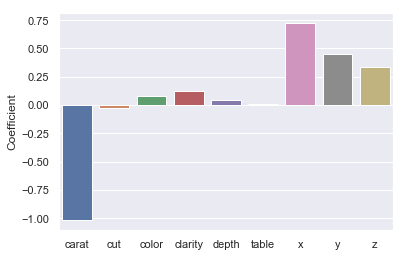

In [86]:
coeff_df = pd.DataFrame(regression_model.coef_, X_train.columns, columns=['Coefficient'])
sns.barplot(x=X_train.columns, y ='Coefficient', data=coeff_df)
coeff_df

Checking intercept: 

In [87]:
intercept = regression_model.intercept_
print("The intercept of our model is {}".format(intercept))


The intercept of our model is -3.472385121059691


Score(R square on training dataset):

In [88]:
Score_train_LR = regression_model.score(X_train, Y_train)

Score_train_LR

0.9762501561086685

Score on test data set:

In [98]:
Score_test_LR = regression_model.score(X_test, Y_test)

Score_test_LR

0.9759258649891549

RMSE on train data :

In [173]:
predicted_train_lr = regression_model.fit(X_train,Y_train).predict(X_train)

#X_train_bk["predicted_LR"] = log_transformer.inverse_transform(predicted_train)
#rmse_train_LR= np.sqrt(metrics.mean_squared_error(X_train_bk['price'],X_train_bk['predicted_LR']))

rmse_train_LR= np.sqrt(metrics.mean_squared_error(Y_train,predicted_train_lr))
rmse_train_LR

0.15682601813848826

RMSE on test data:

In [222]:
predicted_test_lr = regression_model.fit(X_test,Y_test).predict(X_test)

#X_test_bk["predicted_LR"] = log_transformer.inverse_transform(predicted_test)

#rmse_test_LR=np.sqrt(metrics.mean_squared_error(X_test_bk['price'],X_test_bk['predicted_LR']))

rmse_test_LR=np.sqrt(metrics.mean_squared_error(Y_test,predicted_test_lr))

rmse_test_LR

0.1585247270893145

In [178]:
df_zirconia['price_log_trns'].mean()

7.782790144758586

Model Accuracy:

In [172]:
LR_model_accuracy = 1- (0.15682601813848826/7.782790144758586)

LR_model_accuracy

0.9798496406530883

In [106]:
y_pred = regression_model.predict(X_test)

In [107]:
comp = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})

comp.head()

,Actual,Predicted
16997,8.574140,8.646864
24457,8.408494,8.302072
16612,9.363061,9.356324
308,8.106816,8.216355
26652,9.476084,9.499700


# Linear regression using StatsModel

In [108]:
data_train = pd.concat([X_train,Y_train],axis=1)
data_test = pd.concat([X_test,Y_test],axis=1)


In [53]:
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price_log_trns
22114,0.34,2,2,3,62.4,60.0,4.41,4.44,2.76,6.287859
2275,0.30,0,5,3,61.2,55.0,4.35,4.31,2.65,6.739337
19183,0.50,0,3,2,62.5,57.0,5.09,5.05,3.17,7.123673
5030,1.10,3,5,1,63.3,56.0,6.53,6.58,4.15,8.310415
25414,1.02,1,4,1,61.1,62.0,6.54,6.49,3.98,8.308446


Renaming column name where ever there is space in the name

In [54]:
data_test.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price_log_trns'],
      dtype='object')

In [ ]:
#Variable with spaces will give an error, so need to remove variable with space

In [55]:
#data_train.rename(columns={"cut_Very Good":"cut_Very_Good"},inplace=True)
#data_test.rename(columns={"cut_Very Good":"cut_Very_Good"},inplace=True)

In [56]:
data_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price_log_trns'],
      dtype='object')

In [109]:
#expr = 'price_log_trns ~ carat + cut + depth + table + x + y + z + color_E+ color_F + color_G + color_H + color_I+ color_J+ clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2+ clarity_VVS1 + clarity_VVS2'

expr = 'price_log_trns ~ carat + cut + color + clarity + depth + table + x + y + z'

In [110]:
import statsmodels.formula.api as smf

lm1= smf.ols(formula=expr, data=data_train).fit()

In [111]:
lm1.params

Intercept   -3.472385
carat       -1.018228
cut         -0.026786
color        0.080319
clarity      0.121270
depth        0.047425
table        0.009885
x            0.727195
y            0.451815
z            0.338177
dtype: float64

In [112]:
print(lm1.summary())

#P value is 0.00, it means predicted power of all the variables are significant 

#backward ellimnation does not required here

                            OLS Regression Results                            
Dep. Variable:         price_log_trns   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 8.606e+04
Date:                Sat, 30 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:00:14   Log-Likelihood:                 8176.2
No. Observations:               18853   AIC:                        -1.633e+04
Df Residuals:                   18843   BIC:                        -1.625e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.4724      0.136    -25.537      0.0

In [119]:
#Calculate MSE

mse= np.mean((lm1.predict(data_train.drop('price_log_trns', axis=1)) - data_train['price_log_trns']) ** 2)

In [114]:
np.sqrt(mse)

0.1568260181384881

In [120]:
np.sqrt(lm1.mse_resid)

0.15686762648554664

In [121]:
y_pred = lm1.predict(data_test)

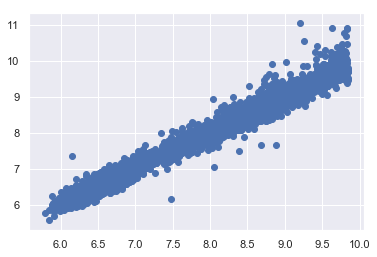

In [122]:
plt.scatter(Y_test, y_pred)

In [123]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-3.47) * Intercept + (-1.02) * carat + (-0.03) * cut + (0.08) * color + (0.12) * clarity + (0.05) * depth + (0.01) * table + (0.73) * x + (0.45) * y + (0.34) * z + 

# Regression Analysis using other different Models:

1. Random Forest, Neural Network and Decesion Tree all we can use for both classification and Regression problems.

2. Here as the target is contineous, so we will import regression libraries and perform model building using Random Forest, Neural Network and Decesion Tree

In [124]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

# Random Forest Regression

In [184]:
rfcl = RandomForestRegressor(random_state=1)

In [185]:
rfcl.fit(X_train,Y_train)

RandomForestRegressor(random_state=1)

         Important
y         0.825709
carat     0.102443
clarity   0.030505
x         0.020768
color     0.014554
z         0.002402
depth     0.001419
table     0.001114
cut       0.001086


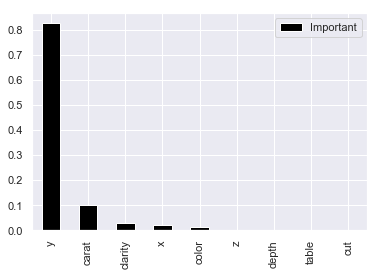

In [186]:
pd.DataFrame(rfcl.feature_importances_, columns = ["Important"], 
                    index = X_train.columns).sort_values('Important',ascending=False).plot(kind='bar',color='black');
print(pd.DataFrame(rfcl.feature_importances_, columns = ["Important"], 
                    index = X_train.columns).sort_values('Important',ascending=False))

In [187]:
#Prediction on train and test dataset
ytrain_predict_rfcl = rfcl.predict(X_train)
ytest_predict_rfcl = rfcl.predict(X_test)

In [188]:
rm_train_score=rfcl.score(X_train,Y_train)
print(rm_train_score)

0.9987764339433919


In [189]:
rm_test_score=rfcl.score(X_test,Y_test)
print(rm_test_score)

0.9911496208950712


In [190]:
predicted_train_rm = rfcl.fit(X_train,Y_train).predict(X_train)

#X_train_bk["predicted_RM"] = log_transformer.inverse_transform(predicted_train)

#rmse_train_RM=np.sqrt(metrics.mean_squared_error(X_train_bk['price'],X_train_bk['predicted_RM']))

rmse_train_RM=np.sqrt(metrics.mean_squared_error(Y_train,predicted_train_rm))

rmse_train_RM

0.03559602034626622

In [191]:
predicted_test_rm = rfcl.fit(X_test,Y_test).predict(X_test)

#X_test_bk["predicted_RM"] = log_transformer.inverse_transform(predicted_test)

#rmse_test_RM=np.sqrt(metrics.mean_squared_error(X_test_bk['price'],X_test_bk['predicted_RM']))

rmse_test_RM=np.sqrt(metrics.mean_squared_error(Y_test,predicted_test_rm))

rmse_test_RM

0.03877383290612019

In [192]:
RM_model_accuracy= 1 - (0.03877383290612019/7.782790144758586)

RM_model_accuracy

0.9950180035456522

# Neural Network regression

In [193]:
#Scale the data using standard scaler
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
X_trains=sc.fit_transform(X_train)
X_tests=sc.transform(X_test)
#we will fit the train data so that the model will learn mean and variance of the features and these learned parameters will use to scale test dataset

In [194]:

ann=MLPRegressor(random_state=1)

In [195]:
ann.fit(X_trains,Y_train)

MLPRegressor(random_state=1)

In [196]:
#Prediction on train and test dataset
ytrain_predict_ann = ann.predict(X_trains)
ytest_predict_ann = ann.predict(X_tests)

In [197]:
an_train_score=ann.score(X_trains,Y_train)
print(an_train_score)

0.987474289946935


In [198]:
an_test_score=ann.score(X_tests,Y_test)
print(an_test_score)

0.9855151140307447


In [200]:
predicted_train_ann = ann.fit(X_train,Y_train).predict(X_train)

#X_train_bk["predicted_ANN"] = log_transformer.inverse_transform(predicted_train)

#rmse_train_ANN=np.sqrt(metrics.mean_squared_error(X_train_bk['price'],X_train_bk['predicted_ANN']))
rmse_train_ANN=np.sqrt(metrics.mean_squared_error(Y_train,predicted_train_ann))

rmse_train_ANN

0.1283292495602866

In [201]:
predicted_test_ann = ann.fit(X_test,Y_test).predict(X_test)

#X_test_bk["predicted_ANN"] = log_transformer.inverse_transform(predicted_test)

#rmse_test_ANN=np.sqrt(metrics.mean_squared_error(X_test_bk['price'],X_test_bk['predicted_ANN']))
rmse_test_ANN=np.sqrt(metrics.mean_squared_error(Y_test, predicted_test_ann))

rmse_test_ANN

0.13541168946103715

In [202]:
AN_model_accuracy= 1-(0.13541168946103715/7.782790144758586)

AN_model_accuracy

0.9826011382881457

# Decision Tree Regression

In [203]:
dt = tree.DecisionTreeRegressor(random_state=1)

In [204]:
dt.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=1)

         Important
y         0.861155
carat     0.074725
clarity   0.030038
color     0.016211
x         0.012502
z         0.001863
depth     0.001366
table     0.001092
cut       0.001047


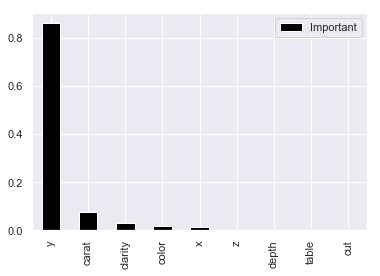

In [205]:
pd.DataFrame(dt.feature_importances_, columns = ["Important"], 
                    index = X_train.columns).sort_values('Important',ascending=False).plot(kind='bar',color='black');
print(pd.DataFrame(dt.feature_importances_, columns = ["Important"], 
                    index = X_train.columns).sort_values('Important',ascending=False))

In [206]:
#Prediction on train and test dataset
ytrain_predict_dt = dt.predict(X_train)
ytest_predict_dt = dt.predict(X_test)

In [207]:
dt_train_score=dt.score(X_train,Y_train)
print(dt_train_score)

0.9999953911456447


In [208]:
dt_test_score=dt.score(X_test,Y_test)
print(dt_test_score)

0.9838262056306449


In [209]:
predicted_train_dt = dt.fit(X_train,Y_train).predict(X_train)

#X_train_bk["predicted_DT"] = log_transformer.inverse_transform(predicted_train)

#rmse_train_DT=np.sqrt(metrics.mean_squared_error(X_train_bk['price'],X_train_bk['predicted_DT']))

rmse_train_DT=np.sqrt(metrics.mean_squared_error(Y_train, predicted_train_dt))

rmse_train_DT

0.002184661866758022

In [211]:
predicted_test_dt = dt.fit(X_test,Y_test).predict(X_test)

#X_test_bk["predicted_DT"] = log_transformer.inverse_transform(predicted_test)

#rmse_test_DT=np.sqrt(metrics.mean_squared_error(X_test_bk['price'],X_test_bk['predicted_DT']))

rmse_test_DT=np.sqrt(metrics.mean_squared_error(Y_test, predicted_test_dt))

rmse_test_DT

0.001915968293850118

In [212]:
DT_model_accuracy = 1 - (0.001915968293850118/7.782790144758586)

DT_model_accuracy

0.9997538198694538

# Model Comparisions

In [213]:
train_rmse=[rmse_train_DT,rmse_train_RM,rmse_train_ANN,rmse_train_LR]

In [214]:
test_rmse=[rmse_test_DT,rmse_test_RM,rmse_test_ANN,rmse_test_LR]

In [215]:
train_score=[dt_train_score,rm_train_score,an_train_score,Score_train_LR]

In [216]:
test_score=[dt_test_score,rm_test_score,an_test_score,Score_test_LR]

In [217]:
model_accuracy =[DT_model_accuracy,RM_model_accuracy,AN_model_accuracy,LR_model_accuracy]

In [219]:
Performace=pd.DataFrame({'Train_RMSE': train_rmse,'Test_RMSE': test_rmse,'Train_Score':train_score,'Test_Score': test_score,'Accuracy': model_accuracy},
            index=['Decision Tree Regression','Random Forest Regression','ANN Regression', 'Linear Regression'])

cm = sns.dark_palette("yellow", reverse=True,as_cmap=True)

(Performace.style.background_gradient(cmap=cm)).set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt')]}])

,Train_RMSE,Test_RMSE,Train_Score,Test_Score,Accuracy
Decision Tree Regression,0.002185,0.001916,0.999995,0.983826,0.999754
Random Forest Regression,0.035596,0.038774,0.998776,0.991150,0.995018
ANN Regression,0.128329,0.135412,0.987474,0.985515,0.982601
Linear Regression,0.156826,0.158525,0.976250,0.975926,0.979850


1. None of the model is over-fitting/under fitting much.

2. All models test and train score are comparable and within 1-2% range.

3. Among all these models we will go for Randorm forecst which has 99% both in accuracy and test scoring

# 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

Summarization of various steps performed:

1. Firstly removed the variable unnamed as it is an index variable and there is no use of it in further analysis.

2. Used plots such as pairplot, boxplot, barplot, scatter plot, heat map,count plot

3. Have done outlier treatment, missing value treatment, duplicate removal, data encoding for categorical variables and log transformation of the depandant variable "Price"

4. Once the data was ready for model building, have built regression model such as linear regression, random forest, decesion tree and neural netowrk by making the split between train and test having ratio of 70:30 and have choosen the best model.

Interpretation:

1. As per the linear regression model x and carat are the important variables, at the same time, in random forest and Decision tree "Y" being the most important variable. 

2. If we check the heatmap and correlation table can see x,y,z and carat are the important variables which has a strong relationship with "Price"

3. So the final interpretaion we can make as x,y,z and carat are the high valuable variables.

4. On the other hand, it is being noticed that, color has great impact on price. If color is "D" then quality is less also
 price is less and if color is "J" quality is highest and price also rises.
 
5. However, strange thing is clarity and cut does not have much impact on price. Although, less blemishes means price should be higher, but price is not alligning with the clarity. And the same is applicable for "cut" as well. Bsed on the cutting order,price is not alligning with it.

6. Price is dependant on hight, width, length, carat and color.

Action:

1. As we know, it must be cost affective and time consuming to remove blemishes and make the zericon purest. But somehow, price is not based on clarity, it is basically a loss for business or we can say less profit. To make a good amount of profit, business must rise the price of the zericon wherever blemishes is less.

2. Cutting is also a big deal and it is time consuming. But Zericon price is not allinged with cutting. For an instance: "Ideal" is the best quality cutting but the price is not highest whereas company spends more money on best quality cutting. So here also, company will not make much profit. Because spending is more in compare to gaining. Therefore, business should revise
the price of zericon wherever cutting quality is best.



# Problem 2: Logistic Regression and LDA

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

Dataset for Problem 2: Holiday_Package.csv

# Data Dictionary:

Variable Name	Description

Holiday_Package 	 Opted for Holiday Package yes/no?

Salary : 	 Employee salary

age :	 Age in years

edu :	 Years of formal education

no_young_children :  The number of young children (younger than 7 years)

no_older_children :	 Number of older children

foreign :	 foreigner Yes/No
 

# 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [56]:
df2= pd.read_csv('Holiday_Package.csv')

In [4]:
df2.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [5]:
df2.shape

(872, 8)

In [57]:
df_travel=df2.drop('Unnamed: 0',axis=1)

In [7]:
df_travel.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [8]:
df_travel.tail()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,no,40030,24,4,2,1,yes
868,yes,32137,48,8,0,0,yes
869,no,25178,24,6,2,0,yes
870,yes,55958,41,10,0,1,yes
871,no,74659,51,10,0,0,yes


In [9]:
df_travel.shape

(872, 7)

In [8]:
#872 raws and 7 columns

In [58]:
df_travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


1. All raw counts is same for all the variables, definately here is no missing value

2. two variables Holiday_package and foreign is having string dype. Which will be perform treatment later part

In [12]:
df_travel.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


In [13]:
df_travel.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [235]:
(df_travel['Salary'] == 0).sum()

0

In [236]:
(df_travel['age'] == 0).sum()

0

In [237]:
(df_travel['educ'] == 0).sum()

0

In [14]:
df_travel['no_young_children'].unique()

array([1, 0, 2, 3], dtype=int64)

In [15]:
df_travel['no_older_children'].unique()

array([1, 0, 2, 4, 3, 5, 6], dtype=int64)

There is no such value for which we can consider zero as missing. So data is correct

In [16]:
df_travel.duplicated().sum()

0

There is no duplicate value as well

# Uni-variate Analysis

Salary

In [59]:
minimum= df_travel['Salary'].min()
maximum = df_travel['Salary'].max()
std = df_travel['Salary'].std()
data_range= df_travel['Salary'].max() - df_travel['Salary'].min()
Mean= df_travel['Salary'].mean()
first_qtr = df_travel['Salary'].quantile(q=0.25)
third_qtr = df_travel['Salary'].quantile(q=0.75)
IQR = stats.iqr(df_travel['Salary'])
LR =  df_travel['Salary'].quantile(q=0.25) - (1.5 * stats.iqr(df_travel['Salary']))
UR = df_travel['Salary'].quantile(q=0.75) + (1.5 * stats.iqr(df_travel['Salary']))
CV= std / Mean

data_Salary = {'Min': [minimum], 'Max': [maximum], 'Std': [std], 'Data_Range': [data_range]
, 'Average': [Mean], '25%': [first_qtr] , '75%': [third_qtr], 'IQR': [IQR], 'LR': [LR]
                    ,'UR': [UR], 'CV': [CV]}

Salary_analysis = pd.DataFrame(data_Salary)

cm = sns.dark_palette("white", reverse=True,as_cmap=True)

(Salary_analysis.style.background_gradient(cmap=cm)).set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt')]}])

,Min,Max,Std,Data_Range,Average,25%,75%,IQR,LR,UR,CV
0,1322,236961,23418.668531,235639,47729.172018,35324.000000,53469.500000,18145.500000,8105.750000,80687.750000,0.490657


Age:

In [18]:
minimum= df_travel['age'].min()
maximum = df_travel['age'].max()
std = df_travel['age'].std()
data_range= df_travel['age'].max() - df_travel['age'].min()
Mean= df_travel['age'].mean()
first_qtr = df_travel['age'].quantile(q=0.25)
third_qtr = df_travel['age'].quantile(q=0.75)
IQR = stats.iqr(df_travel['age'])
LR =  df_travel['age'].quantile(q=0.25) - (1.5 * stats.iqr(df_travel['age']))
UR = df_travel['age'].quantile(q=0.75) + (1.5 * stats.iqr(df_travel['age']))
CV= std / Mean

data_Age = {'Min': [minimum], 'Max': [maximum], 'Std': [std], 'Data_Range': [data_range]
, 'Average': [Mean], '25%': [first_qtr] , '75%': [third_qtr], 'IQR': [IQR], 'LR': [LR]
                    ,'UR': [UR], 'CV': [CV]}

Age_analysis = pd.DataFrame(data_Age)

cm = sns.dark_palette("white", reverse=True,as_cmap=True)

(Age_analysis.style.background_gradient(cmap=cm)).set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt')]}])

,Min,Max,Std,Data_Range,Average,25%,75%,IQR,LR,UR,CV
0,20,62,10.551675,42,39.955275,32.000000,48.000000,16.000000,8.000000,72.000000,0.264087


educ: years of formal education

In [19]:
minimum= df_travel['educ'].min()
maximum = df_travel['educ'].max()
std = df_travel['educ'].std()
data_range= df_travel['educ'].max() - df_travel['educ'].min()
Mean= df_travel['educ'].mean()
first_qtr = df_travel['educ'].quantile(q=0.25)
third_qtr = df_travel['educ'].quantile(q=0.75)
IQR = stats.iqr(df_travel['educ'])
LR =  df_travel['educ'].quantile(q=0.25) - (1.5 * stats.iqr(df_travel['educ']))
UR = df_travel['educ'].quantile(q=0.75) + (1.5 * stats.iqr(df_travel['educ']))
CV= std / Mean

data_educ = {'Min': [minimum], 'Max': [maximum], 'Std': [std], 'Data_Range': [data_range]
, 'Average': [Mean], '25%': [first_qtr] , '75%': [third_qtr], 'IQR': [IQR], 'LR': [LR]
                    ,'UR': [UR], 'CV': [CV]}

educ_analysis = pd.DataFrame(data_educ)

cm = sns.dark_palette("White", reverse=True,as_cmap=True)

(educ_analysis.style.background_gradient(cmap=cm)).set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt')]}])

,Min,Max,Std,Data_Range,Average,25%,75%,IQR,LR,UR,CV
0,1,21,3.036259,20,9.307339,8.000000,12.000000,4.000000,2.000000,18.000000,0.326222


no_young_children

In [20]:
minimum= df_travel['no_young_children'].min()
maximum = df_travel['no_young_children'].max()
std = df_travel['no_young_children'].std()
data_range= df_travel['no_young_children'].max() - df_travel['no_young_children'].min()
Mean= df_travel['no_young_children'].mean()
first_qtr = df_travel['no_young_children'].quantile(q=0.25)
third_qtr = df_travel['no_young_children'].quantile(q=0.75)
IQR = stats.iqr(df_travel['no_young_children'])
LR =  df_travel['no_young_children'].quantile(q=0.25) - (1.5 * stats.iqr(df_travel['no_young_children']))
UR = df_travel['no_young_children'].quantile(q=0.75) + (1.5 * stats.iqr(df_travel['no_young_children']))
CV= std / Mean

data_no_young_children = {'Min': [minimum], 'Max': [maximum], 'Std': [std], 'Data_Range': [data_range]
, 'Average': [Mean], '25%': [first_qtr] , '75%': [third_qtr], 'IQR': [IQR], 'LR': [LR]
                    ,'UR': [UR], 'CV': [CV]}

no_young_children_analysis = pd.DataFrame(data_no_young_children)

cm = sns.dark_palette("white", reverse=True,as_cmap=True)

(no_young_children_analysis.style.background_gradient(cmap=cm)).set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt')]}])

,Min,Max,Std,Data_Range,Average,25%,75%,IQR,LR,UR,CV
0,0,3,0.612870,3,0.311927,0.000000,0.000000,0.000000,0.000000,0.000000,1.964789


no_older_children:

In [21]:
minimum= df_travel['no_older_children'].min()
maximum = df_travel['no_older_children'].max()
std = df_travel['no_older_children'].std()
data_range= df_travel['no_older_children'].max() - df_travel['no_older_children'].min()
Mean= df_travel['no_older_children'].mean()
first_qtr = df_travel['no_older_children'].quantile(q=0.25)
third_qtr = df_travel['no_older_children'].quantile(q=0.75)
IQR = stats.iqr(df_travel['no_older_children'])
LR =  df_travel['no_older_children'].quantile(q=0.25) - (1.5 * stats.iqr(df_travel['no_older_children']))
UR = df_travel['no_older_children'].quantile(q=0.75) + (1.5 * stats.iqr(df_travel['no_older_children']))
CV= std / Mean

data_no_older_children = {'Min': [minimum], 'Max': [maximum], 'Std': [std], 'Data_Range': [data_range]
, 'Average': [Mean], '25%': [first_qtr] , '75%': [third_qtr], 'IQR': [IQR], 'LR': [LR]
                    ,'UR': [UR], 'CV': [CV]}

no_older_children_analysis = pd.DataFrame(data_no_older_children)

cm = sns.dark_palette("white", reverse=True,as_cmap=True)

(no_older_children_analysis.style.background_gradient(cmap=cm)).set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt')]}])

,Min,Max,Std,Data_Range,Average,25%,75%,IQR,LR,UR,CV
0,0,6,1.086786,6,0.982798,0.000000,2.000000,2.000000,-3.000000,5.000000,1.105808


Outlier Analysis:

In [22]:
df_travel_numc=df_travel.drop(['Holliday_Package','foreign'],axis=1)
#sns.boxplot(x="variable", y="value", data=pd.melt(df_zirconia))

In [23]:
df_travel_numc.head()

,Salary,age,educ,no_young_children,no_older_children
0,48412,30,8,1,1
1,37207,45,8,0,1
2,58022,46,9,0,0
3,66503,31,11,2,0
4,66734,44,12,0,2


In [15]:
#Checking outliers

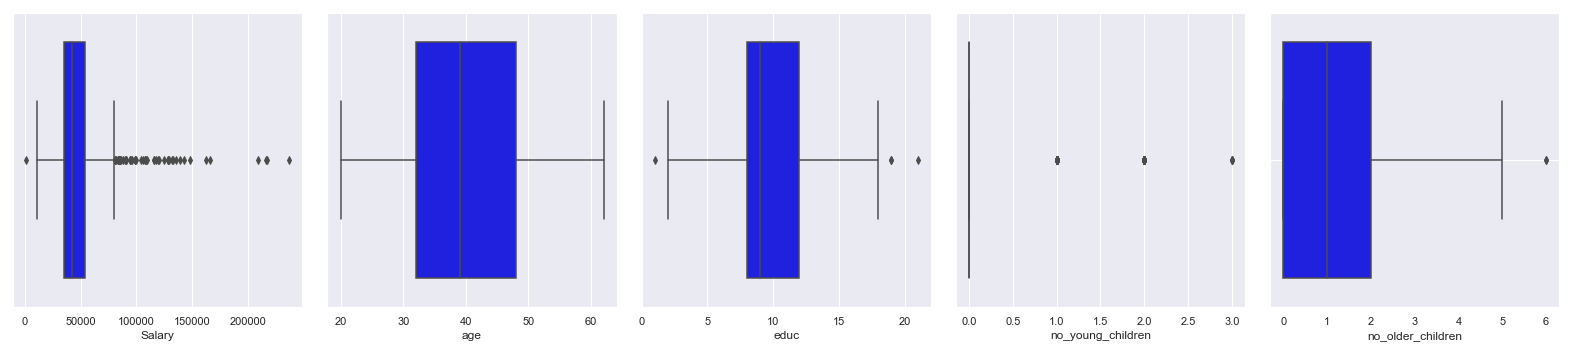

In [24]:
fig, (x1,x2,x3,x4,x5)=plt.subplots(1,5,figsize=(22,5))
sns.boxplot(x='Salary',data=df_travel_numc,ax=x1,color='blue')
sns.boxplot(x='age',data=df_travel_numc,ax=x2,color='blue')
sns.boxplot(x='educ',data=df_travel_numc,ax=x3,color='blue')
sns.boxplot(x='no_young_children',data=df_travel_numc,ax=x4,color='blue')
sns.boxplot(x='no_older_children',data=df_travel_numc,ax=x5,color='blue')
plt.grid()
plt.tight_layout()

1. Except age it seems there is outlier in all other variable

2. We will outlier treatment using lower range and outer range in later part

Data distribution:

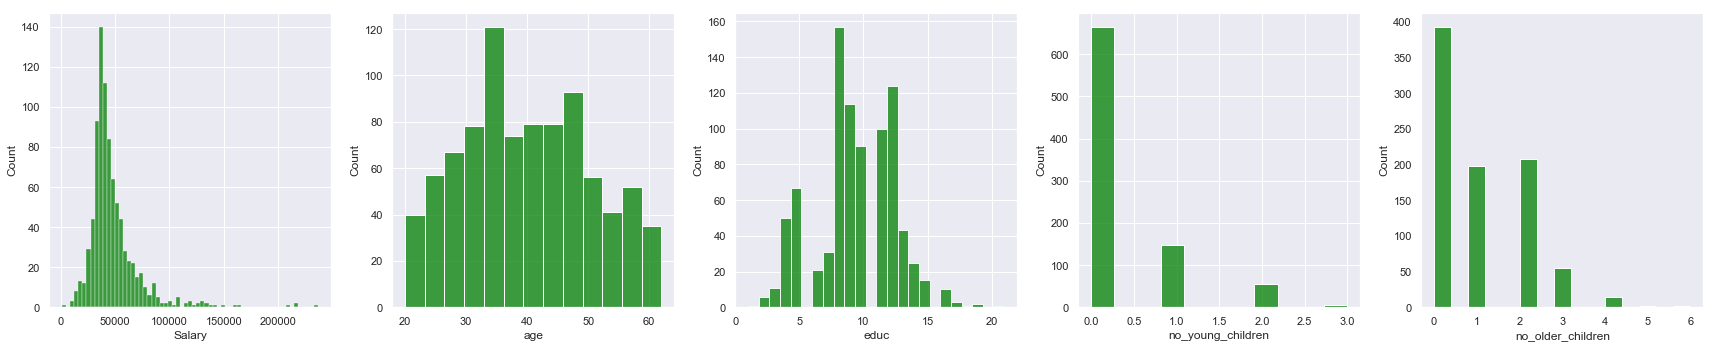

In [25]:
fig, (x1,x2,x3,x4,x5)=plt.subplots(1,5,figsize=(24,5))
sns.histplot(x='Salary',data=df_travel,ax=x1,color='green')
sns.histplot(x='age',data=df_travel,ax=x2,color='green')
sns.histplot(x='educ',data=df_travel,ax=x3,color='green')
sns.histplot(x='no_young_children',data=df_travel,ax=x4,color='green')
sns.histplot(x='no_older_children',data=df_travel,ax=x5,color='green')
plt.grid()
plt.tight_layout()

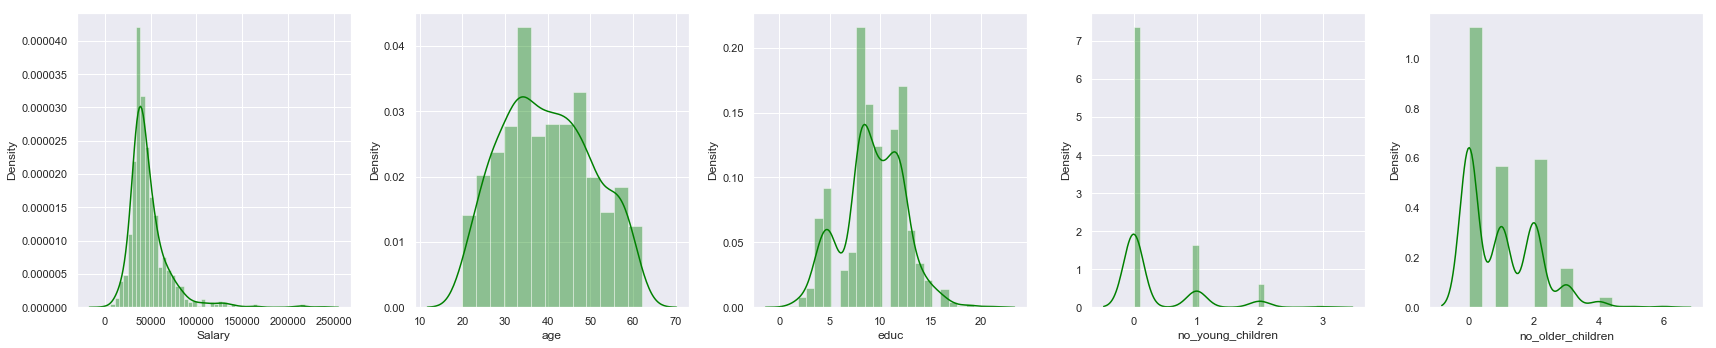

In [26]:
fig, (x1,x2,x3,x4,x5)=plt.subplots(1,5,figsize=(24,5))
sns.distplot(df_travel['Salary'],ax=x1,color='green')
sns.distplot(df_travel['age'],ax=x2,color='green')
sns.distplot(df_travel['educ'],ax=x3,color='green')
sns.distplot(df_travel['no_young_children'],ax=x4,color='green')
sns.distplot(df_travel['no_older_children'],ax=x5,color='green')
plt.grid()
plt.tight_layout()

1. From all the variables age is the only one which has complete normally distributed data

2. Salary is lilttle bit right skewed and also looking like partial normally distributed

3. Infact, education is also partial normal distribution

4. Most of the employess having salary ranges up tp 100000, and only few having more than that.

5. Most of the employess having no young children which is causing right skewed

6. Most of the employess having no older children as well 

Analysis of Categorical variable:

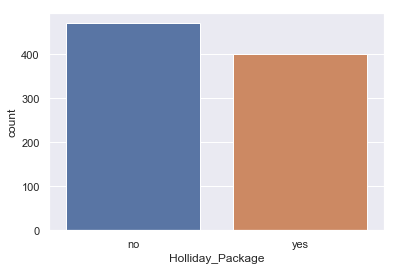

In [27]:
sns.countplot(x='Holliday_Package',data=df_travel);

No of holiday package which are not opted is more in compare to which are opted

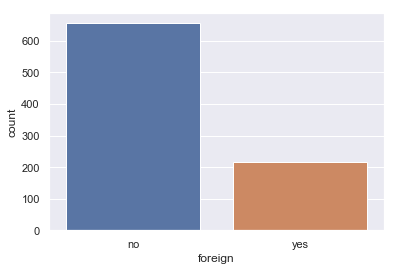

In [28]:
sns.countplot(x='foreign',data=df_travel);

No of foreigner is very less in compare to non-foreigners

# Bi-Variate Analysis

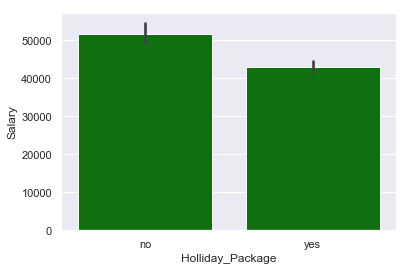

In [29]:
sns.barplot(data=df_travel,y='Salary', x='Holliday_Package',color='green')

When salary increases, no of employee holiday package is decreases.

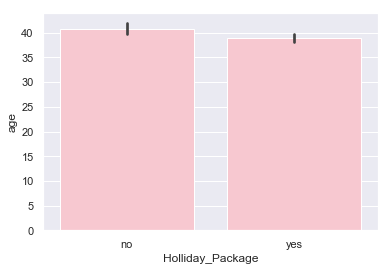

In [30]:
sns.barplot(data=df_travel,y='age', x='Holliday_Package',color='pink')

When Age of the employee increases, Opting Holiday packages decreses

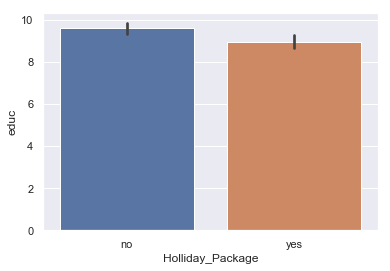

In [28]:
sns.barplot(data=df_travel,y='educ', x='Holliday_Package')

If employee is having more education can see that, holiday packages opting is more "No"

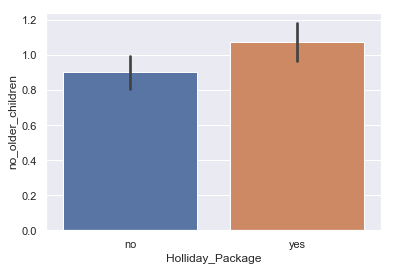

In [29]:
sns.barplot(data=df_travel,y='no_older_children', x='Holliday_Package')

Employes who have no of older chindren high, opted more Holiday packages

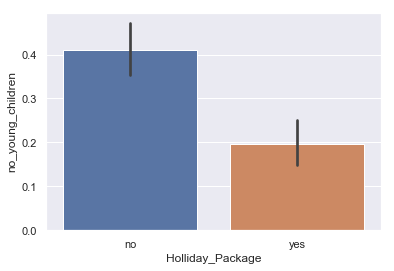

In [30]:
sns.barplot(data=df_travel,y='no_young_children', x='Holliday_Package')

Employess who have no of younger children high, does not opt for Holiday packages, In fact opting is very less.

# Multi-Variate Analysis

In [60]:
df_travel_corr = pd.DataFrame(df_travel_numc.corr())

cm = sns.light_palette("blue",as_cmap=True)

(df_travel_corr.style.background_gradient(cmap=cm))

,Salary,age,educ,no_young_children,no_older_children
Salary,1.000000,0.071709,0.326540,-0.029664,0.113772
age,0.071709,1.000000,-0.149294,-0.519093,-0.116205
educ,0.326540,-0.149294,1.000000,0.098350,-0.036321
no_young_children,-0.029664,-0.519093,0.098350,1.000000,-0.238428
no_older_children,0.113772,-0.116205,-0.036321,-0.238428,1.000000


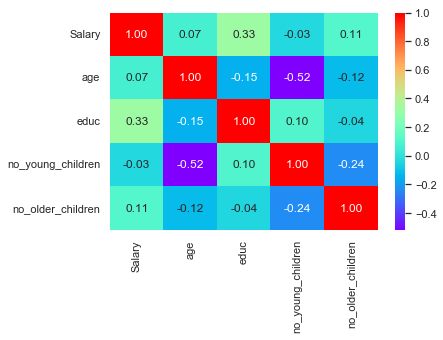

In [32]:
sns.heatmap(df_travel_numc.corr(),annot=True,fmt=".2f",cmap="rainbow")

1. There is no correlation among variables. If anything is there that is very week

2. So, the data is correct for logistic and LDA because the assumption is that, there should not be high correlations

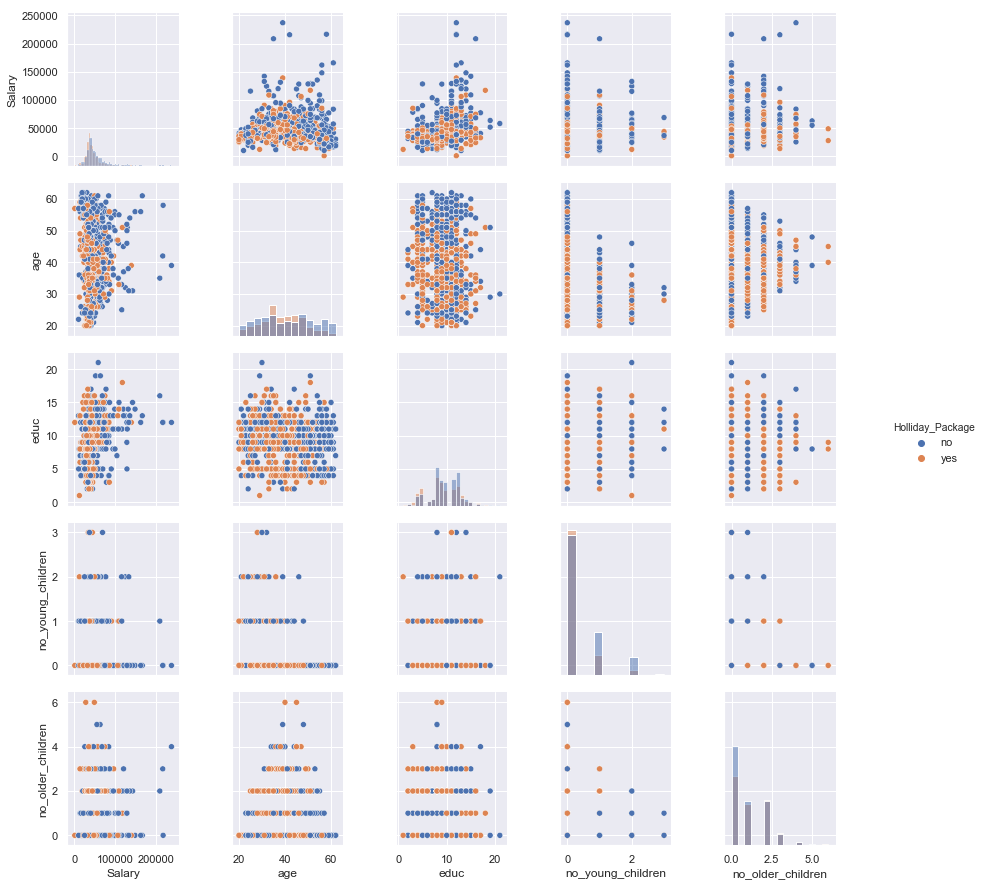

In [33]:
sns.pairplot(df_travel,diag_kind='hist',hue='Holliday_Package')

# Outlier Treatment

We will treat outlier only for Salary because it has huge outliers available but others are having very less, so there is no harm for model building.

In [61]:
   def remove_outlier(col):
    sorted(col) 
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

## Check the lower range and upper range for the variable with zscore
lr,ur=remove_outlier(df_travel['Salary'])
print("lower range",lr, "and upper range", ur)

df_travel['Salary']=np.where(df_travel['Salary']>ur,ur,df_travel['Salary'])
df_travel['Salary']=np.where(df_travel['Salary']<lr,lr,df_travel['Salary'])

lower range 8105.75 and upper range 80687.75


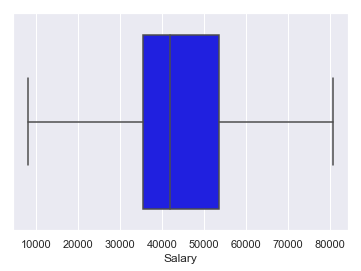

In [62]:
sns.boxplot(x='Salary',data=df_travel,color='blue')

Spelling correct for column name:

In [63]:
df_travel.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

Here Holliday_Package is having one extra "L" so we will correct the name for business ready

In [64]:
df_travel.rename(columns={'Holliday_Package':'Holiday_Package'},inplace=True)

In [65]:
df_travel.columns

Index(['Holiday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

Can notice that Salary and Holiday package starts with capital letter but all other from small, which seems to be awkward.

So we can make change to all the variable name

In [66]:
df_travel.rename(columns={'age':'Age','educ':'Education','no_young_children':'No_Young_Children','no_older_children': 'No_Older_Children','foreign':'Foreigner'},inplace=True)

In [67]:
df_travel.columns

Index(['Holiday_Package', 'Salary', 'Age', 'Education', 'No_Young_Children',
       'No_Older_Children', 'Foreigner'],
      dtype='object')

# 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).


# Data Encoding(having string values)

In [40]:
df_travel['Holiday_Package'].unique()

array(['no', 'yes'], dtype=object)

In [68]:
df_travel['Holiday_Package'].replace(['no', 'yes'],[0,1],inplace=True)

In [42]:
df_travel['Holiday_Package'].unique()

array([0, 1], dtype=int64)

In [69]:
df_travel['Holiday_Package'].value_counts()

0    471
1    401
Name: Holiday_Package, dtype: int64

In [71]:
df_travel['Foreigner'].unique()

array(['no', 'yes'], dtype=object)

In [73]:
df_travel['Foreigner'].replace(['no', 'yes'],[0,1],inplace=True)

In [74]:
df_travel['Foreigner'].unique()

array([0, 1], dtype=int64)

In [75]:
df_travel['Foreigner'].value_counts()

0    656
1    216
Name: Foreigner, dtype: int64

In [77]:
df_travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holiday_Package    872 non-null    int64  
 1   Salary             872 non-null    float64
 2   Age                872 non-null    int64  
 3   Education          872 non-null    int64  
 4   No_Young_Children  872 non-null    int64  
 5   No_Older_Children  872 non-null    int64  
 6   Foreigner          872 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 47.8 KB


In [167]:
df_travel.head()

,Salary,Age,Education,No_Young_Children,No_Older_Children,Foreign
0,48412.0,30,8,1,1,0
1,37207.0,45,8,0,1,0
2,58022.0,46,9,0,0,0
3,66503.0,31,11,2,0,0
4,66734.0,44,12,0,2,0


# Data Split: 70:30

In [78]:
X = df_travel.drop(['Holiday_Package'], axis=1)
Y = df_travel.pop('Holiday_Package')

In [135]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.30,random_state=1,stratify=Y)

In [80]:
X_train.head()

,Salary,Age,Education,No_Young_Children,No_Older_Children,Foreigner
821,38974.0,47,12,0,2,1
805,40270.0,33,8,2,0,1
322,32573.0,30,11,1,0,0
701,43839.0,43,11,0,1,1
773,33060.0,40,5,1,1,1


In [81]:
Y_train.head()

821    0
805    0
322    0
701    1
773    1
Name: Holiday_Package, dtype: int64

In [88]:
Y_train.value_counts(1)

0    0.539344
1    0.460656
Name: Holiday_Package, dtype: float64

In [90]:
Y_test.value_counts(1)

0    0.541985
1    0.458015
Name: Holiday_Package, dtype: float64

# Logistic Regression:Model building usin Grid Search CV

In [136]:
grid={'penalty':['l2','none','l1'],
     'solver': ['sag','lbfgs','liblinear'],
     'tol':[0.0001,0.00001]}

In [137]:
model=LogisticRegression(max_iter=10000,n_jobs=-1)

In [138]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator = model, param_grid = grid, cv = 3, n_jobs=-1, scoring='f1')

In [139]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=-1),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none', 'l1'],
                         'solver': ['sag', 'lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [140]:
grid_search.best_params_

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-05}

In [141]:
best_model=grid_search.best_estimator_
best_model

LogisticRegression(max_iter=10000, n_jobs=-1, penalty='l1', solver='liblinear',
                   tol=1e-05)

In [142]:
ytrain_predict=best_model.predict(X_train)
y_test_predict=best_model.predict(X_test)

In [143]:
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.671013,0.328987
1,0.560610,0.439390
2,0.684617,0.315383
3,0.508639,0.491361
4,0.560298,0.439702


# LDA : Model building

In [161]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train, Y_train)

Prediction

In [162]:
pred_train_lda=model.predict(X_train)

pred_test_lda=model.predict(X_test)

# 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

# Performance Metrics: Logistic Regression

Train data:

Accuracy:

In [145]:
LGR_Scores_train=best_model.score(X_train,Y_train)
LGR_Scores_train

0.6639344262295082

Confusion Matrix:

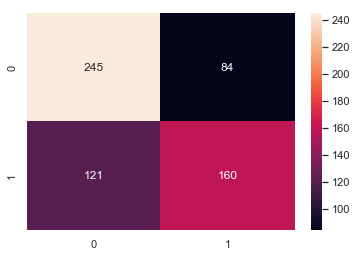

In [147]:
sns.heatmap(confusion_matrix(Y_train, ytrain_predict),annot=True,fmt='.5g')

Classification report:

In [155]:
classification_report_lrg=metrics.classification_report(Y_train,ytrain_predict)

print(classification_report_lrg)

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.57      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610



Roc_Auc Score:

AUC: 0.733


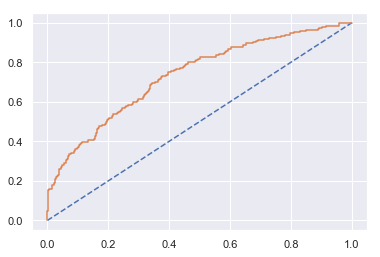

In [156]:
probs=best_model.predict_proba(X_train)
probs=probs[:,1]
auc_lgr_train=roc_auc_score(Y_train,probs)
print('AUC: %.3f' %auc_lgr_train)
train_fpr,train_tpr,train_thershold=roc_curve(Y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr,train_tpr);

Test data: 

Accuracy:

In [157]:
LGR_Scores_test=best_model.score(X_test,Y_test)
LGR_Scores_test

0.6564885496183206

Confusion Matric:

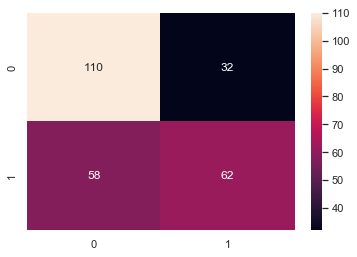

In [158]:
sns.heatmap(confusion_matrix(Y_test, y_test_predict),annot=True,fmt='.5g')

Classification report:

In [159]:
classification_report_lrg_test=metrics.classification_report(Y_test, y_test_predict)

print(classification_report_lrg_test)

              precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.66      0.52      0.58       120

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.64       262
weighted avg       0.66      0.66      0.65       262



AUC: 0.715


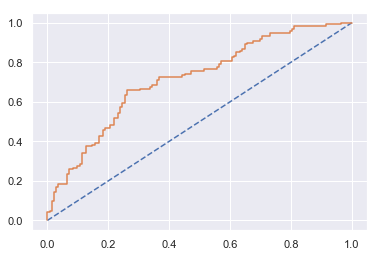

In [160]:
probs=best_model.predict_proba(X_test)
probs=probs[:,1]
auc_lgr_test=roc_auc_score(Y_test,probs)
print('AUC: %.3f' %auc_lgr_test)
test_fpr,test_tpr,test_thershold=roc_curve(Y_test,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr,test_tpr);

# Performance Metrics: LDA

Train data:

Accuracy:

In [163]:
LDA_Scores_train=model.score(X_train,Y_train)
LDA_Scores_train

0.6622950819672131

In [164]:
classification_lda_train=metrics.classification_report(Y_train, pred_train_lda)

print(classification_lda_train)

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.57      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610



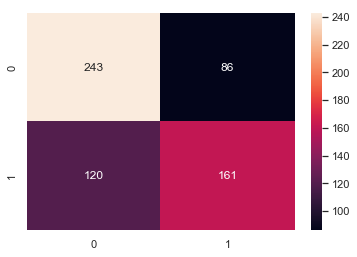

In [165]:
sns.heatmap(confusion_matrix(Y_train, pred_train_lda),annot=True,fmt='.5g')

Roc_Auc_Score:

AUC: 0.731


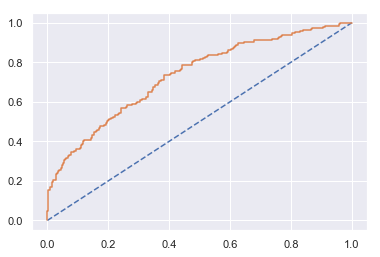

In [166]:
probs=model.predict_proba(X_train)
probs=probs[:,1]
auc_ldr_train=roc_auc_score(Y_train,probs)
print('AUC: %.3f' %auc_ldr_train)
train_fpr_lda,train_tpr_lda,train_thershold_lda=roc_curve(Y_train,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr_lda,train_tpr_lda);

Test data:

Accuracy:

In [167]:
LDA_Scores_test=model.score(X_test,Y_test)
LDA_Scores_test

0.648854961832061

Classification report:

In [168]:
classification_lda_test=metrics.classification_report(Y_test, pred_test_lda)

print(classification_lda_test)

              precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262



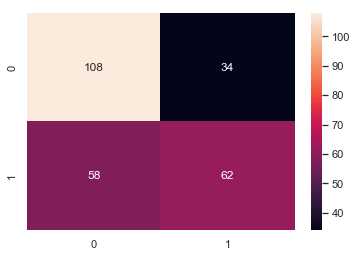

In [169]:
sns.heatmap(confusion_matrix(Y_test, pred_test_lda),annot=True,fmt='.5g')

Roc_Auc_Curve:

AUC: 0.714


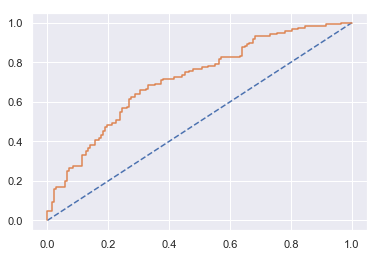

In [170]:
probs=model.predict_proba(X_test)
probs=probs[:,1]
auc_ldr_test=roc_auc_score(Y_test,probs)
print('AUC: %.3f' %auc_ldr_test)
test_fpr_lda,test_tpr_lda,test_thershold_lda=roc_curve(Y_test,probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr_lda,test_tpr_lda);

# Model Comparaisions

Train data:

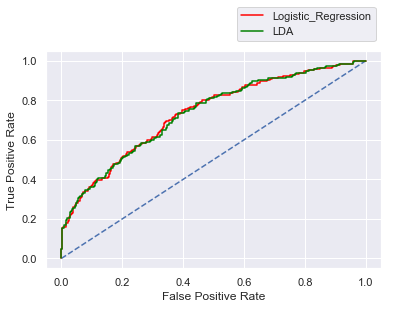

In [171]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr,train_tpr,color='red',label="Logistic_Regression")
plt.plot(train_fpr_lda,train_tpr_lda,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

Test data:

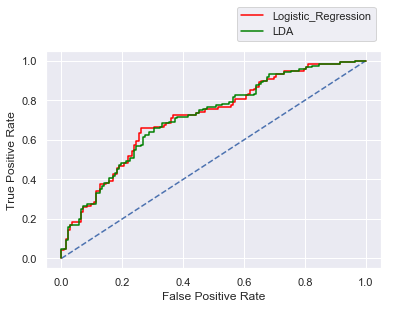

In [172]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr,test_tpr,color='red',label="Logistic_Regression")
plt.plot(test_fpr_lda,test_tpr_lda,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [174]:
train_scores=[LGR_Scores_train,LDA_Scores_train]
test_scores=[LGR_Scores_test,LDA_Scores_test]
auc_train=[auc_lgr_train,auc_ldr_train]
auc_test=[auc_lgr_test,auc_ldr_test]
recall_train=[0.57,0.57]
recall_test=[0.52, 0.52]
precision_train=[0.66,0.65]
precision_test=[0.66,0.65]
f1score_train=[0.61,0.61]
f1score_test=[0.58,0.57]
performance_comp=(pd.DataFrame({'Train_Accuracy': train_scores,'Test_Accuracy': test_scores,'Train_AUC':auc_train,'Test_AUC': auc_test,'Train_Recall':recall_train,'Test_Recall': recall_test,'Train_precision':precision_train,'Test_precision': precision_test,'Train_f1':f1score_train,'Test_f1': f1score_test},
            index=['Logistic Regression','LDA']))

performance_comp.iloc[0:2,:].T 

,Logistic Regression,LDA
Train_Accuracy,0.663934,0.662295
Test_Accuracy,0.656489,0.648855
Train_AUC,0.732826,0.731484
Test_AUC,0.715317,0.713556
Train_Recall,0.570000,0.570000
Test_Recall,0.520000,0.520000
Train_precision,0.660000,0.650000
Test_precision,0.660000,0.650000
Train_f1,0.610000,0.610000
Test_f1,0.580000,0.570000


On comparing all the models, it looks like that no model is over-fitting or under fitting.

All models test and train score are comparable and within 5-6% range.

We can see that all models are giving similar results with not much of difference in accuracy.

We will choose Logistic Regression over LDA because f1 score and accuracy of test data seems to have 1% high

# 2.4 Inference: Basis on these predictions, what are the insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

Summarization of various steps performed:

•	Firstly, removed the variable unnamed as it is an index variable and there is no use of it in further analysis.

•	Used plots such as pair plot, boxplot, barplot, hist plot, dist. plot, heat map and count plot

•	Have done outlier treatment, missing value condition check, duplicate value check, data encoding for categorical variables.

Once the data was ready for model building , have built Logistic regression and LDA model by making the split between train and test having ratio of 70:30 and have chosen the best model as Logistic Regression(Though there was not much difference in performance)

Interpretation:

•	There is very weak correlation among variable which is must required condition for building logistic and LDA.

•	All variables can play important role to attract for the Holiday package

•	We have seen less aged people opt more holiday package

•	At the same time, people who have more salary does not opt much package

•	Employees who have younger children does not opt much

•	Employees having older children may have seen opting more holiday packages

•	Employees having more years of education does not opt holiday packages.

Action:

•	From the model when we find out employees who will not opt, we can first find out what is the factor, whether it is age, salary, education or children.

•	Employees who have more age, as they don’t seem to take travel package more, company can attract those by including old age facilities such as health worker availability 24/7 during the vacation or giving more discount to the employees who crosses certain age such as 50+

•	People who have more salary does not opt much holiday package, may be because as they have money so they can travel by their own without opting for package. So, in this case, nothing much we can do but company can provide more VIP accommodations and comfortable transportation specially to attract them.

•	Employees who have younger children does not take much package; this could be due to the problem in caring young children entire day. In this case, company can include special day care for younger children and during this time parents can visit places by keeping their children in day care in the vacation place if they willing to do so for the comfortness.

